## Rutas

Los archivos utilizados son los siguientes:

In [ ]:
measurements = "measurements.tsv"
measurements_mod = "measurements_mod.tsv"
measurements_mod2 = "measurements_mod2.tsv"
measurements_mod3 = "measurements_mod3.tsv"
measurements_mod4 = "measurements_mod4.tsv"
measurements_mod_DEF = "measurements_mod_DEF.tsv"

## Remapeo de columnas

Remapeo de columnas del archivo de datos.

In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv(measurements, sep='\t', low_memory=False)

# Columnas a eliminar
columns_to_drop = ['bio_npp:left', 'bio_npp:right', 'bio_npp:up', 'bio_npp:down']

# Eliminar columnas no deseadas
df = df.drop(columns=columns_to_drop, errors='ignore')

# Mapeo de renombrado de columnas
column_rename_map = {
    'Instant': 'instant',
    'env_sst': 'env:sst:center',
    'env_sst:left': 'env:sst:left',
    'env_sst:right': 'env:sst:right',
    'env_sst:up': 'env:sst:up',
    'env_sst:down': 'env:sst:down',
    'env_par': 'env:par:center',
    'env_par:left': 'env:par:left',
    'env_par:right': 'env:par:right',
    'env_par:up': 'env:par:up',
    'env_par:down': 'env:par:down',
    'env_fco2': 'env:fco2:center',
    'env_fco2:left': 'env:fco2:left',
    'env_fco2:right': 'env:fco2:right',
    'env_fco2:up': 'env:fco2:up',
    'env_fco2:down': 'env:fco2:down',
    'env_current_uo': 'env:current:uo:center',
    'env_current_uo:left': 'env:current:uo:left',
    'env_current_uo:right': 'env:current:uo:right',
    'env_current_uo:up': 'env:current:uo:up',
    'env_current_uo:down': 'env:current:uo:down',
    'env_current_vo': 'env:current:vo:center',
    'env_current_vo:left': 'env:current:vo:left',
    'env_current_vo:right': 'env:current:vo:right',
    'env_current_vo:up': 'env:current:vo:up',
    'env_current_vo:down': 'env:current:vo:down',
    'bio_chl': 'bio:chl:center',
    'bio_chl:left': 'bio:chl:left',
    'bio_chl:right': 'bio:chl:right',
    'bio_chl:up': 'bio:chl:up',
    'bio_chl:down': 'bio:chl:down',
    'bio_phyto_size_pico': 'bio:phyto:pico:center',
    'bio_phyto_size_pico:left': 'bio:phyto:pico:left',
    'bio_phyto_size_pico:right': 'bio:phyto:pico:right',
    'bio_phyto_size_pico:up': 'bio:phyto:pico:up',
    'bio_phyto_size_pico:down': 'bio:phyto:pico:down',
    'bio_phyto_size_nano': 'bio:phyto:nano:center',
    'bio_phyto_size_nano:left': 'bio:phyto:nano:left',
    'bio_phyto_size_nano:right': 'bio:phyto:nano:right',
    'bio_phyto_size_nano:up': 'bio:phyto:nano:up',
    'bio_phyto_size_nano:down': 'bio:phyto:nano:down',
    'bio_phyto_size_micro': 'bio:phyto:micro:center',
    'bio_phyto_size_micro:left': 'bio:phyto:micro:left',
    'bio_phyto_size_micro:right': 'bio:phyto:micro:right',
    'bio_phyto_size_micro:up': 'bio:phyto:micro:up',
    'bio_phyto_size_micro:down': 'bio:phyto:micro:down'
}

# Renombrar columnas
df = df.rename(columns=column_rename_map)

# Eliminar filas con valores faltantes
# df = df.dropna()

# Verificar que todas las columnas esperadas están presentes
expected_columns = [
    'instant', 'bio_npp',
    'env:sst:center', 'env:sst:left', 'env:sst:right', 'env:sst:up', 'env:sst:down',
    'env:par:center', 'env:par:left', 'env:par:right', 'env:par:up', 'env:par:down',
    'env:current:uo:center', 'env:current:uo:left', 'env:current:uo:right', 'env:current:uo:up', 'env:current:uo:down',
    'env:current:vo:center', 'env:current:vo:left', 'env:current:vo:right', 'env:current:vo:up', 'env:current:vo:down',
    'bio:chl:center', 'bio:chl:left', 'bio:chl:right', 'bio:chl:up', 'bio:chl:down',
    'bio:phyto:pico:center', 'bio:phyto:pico:left', 'bio:phyto:pico:right', 'bio:phyto:pico:up', 'bio:phyto:pico:down',
    'bio:phyto:nano:center', 'bio:phyto:nano:left', 'bio:phyto:nano:right', 'bio:phyto:nano:up', 'bio:phyto:nano:down',
    'bio:phyto:micro:center', 'bio:phyto:micro:left', 'bio:phyto:micro:right', 'bio:phyto:micro:up', 'bio:phyto:micro:down'
]

# Asegurarse de que todas las columnas esperadas están en el DataFrame
for col in expected_columns:
    if col not in df.columns:
        print(f"Advertencia: Columna faltante - {col}")

# Guardar el resultado
df.to_csv(measurements_mod, sep='\t', index=False)

print("Transformación completada. Resultado guardado en transformed_measurements.csv")

Transformación completada. Resultado guardado en transformed_measurements.csv


## Preprocesamiento de datos

### Generación de las latitudes/longitudes (grid_id)

In [ ]:
import xarray as xr
import pandas as pd

def generate_grid_from_nc(input_nc, output_tsv):
    """Genera un archivo grid.tsv con las coordenadas y IDs de grid del NetCDF"""
    
    ds = xr.open_dataset(input_nc)
    
    if 'grid_id' not in ds.variables:
        raise ValueError("El archivo NetCDF debe contener la variable 'grid_id'")
    
    if len(ds.latitude) != 240 or len(ds.longitude) != 240:
        print(f"Advertencia: Se esperaban 240x240 celdas, pero hay {len(ds.latitude)}x{len(ds.longitude)}")
        print("Continuando con las dimensiones disponibles...")
    
    # Crear DataFrame con todas las combinaciones lat/lon
    # Usamos stack() para combinar las dimensiones latitud y longitud
    df = ds[['latitude', 'longitude', 'grid_id']].to_dataframe().reset_index()
    
    df = df[['latitude', 'longitude', 'grid_id']]
    
    df = df.sort_values(by=['latitude', 'longitude'], ascending=[False, True])
    
    df = df.rename(columns={
        'grid_id': 'tile',
        'latitude': 'lat',
        'longitude': 'lon'
    })
    
    df.to_csv(output_tsv, sep='\t', index=False, header=False)
    print(f"Grid generado exitosamente en {output_tsv}")

if __name__ == "__main__":
    input_path = "dataset_region_corrected_and_grided.nc"
    output_path = "grid.tsv"
    
    generate_grid_from_nc(input_path, output_path)

### Reordenamiento de los grids

In [ ]:
import pandas as pd
import re

def alphanumeric_sort_key(tile):
    """Función de ordenación para identificadores alfanuméricos"""
    if pd.isna(tile):
        return (float('inf'), '', float('inf'))
    
    tile = str(tile).strip()
    match = re.match(r'([A-Za-z]+)(\d+)', tile)
    
    if not match:
        return (float('inf'), '', float('inf'))
    
    letters = match.group(1)
    numbers = int(match.group(2))
    return (len(letters), letters, numbers)

def process_grid_file(input_tsv, output_tsv):
    """Procesa el archivo grid.tsv añadiendo ID numérico"""
    
    # Leer el archivo
    df = pd.read_csv(input_tsv, sep='\t', header=None, 
                    names=['tile', 'lat', 'lon'],
                    dtype={'tile': str})
    
    # Eliminar filas con valores faltantes
    df = df.dropna(subset=['tile'])
    
    # Ordenar primero
    df['sort_key'] = df['tile'].apply(alphanumeric_sort_key)
    sort_df = pd.DataFrame(df['sort_key'].tolist(), 
                         columns=['len_letters', 'letters', 'numbers'],
                         index=df.index)
    df = pd.concat([df, sort_df], axis=1)
    df = df.sort_values(by=['len_letters', 'letters', 'numbers'])
    
    # Añadir ID numérico secuencial (comenzando en 1)
    df['id'] = range(1, len(df) + 1)
    
    # Reordenar columnas: tile, lat, lon, id
    df = df[['tile', 'lat', 'lon', 'id']]
    
    # Guardar el resultado
    df.to_csv(output_tsv, sep='\t', index=False, header=False)
    print(f"Archivo procesado guardado en: {output_tsv}")
    print(f"Total de celdas: {len(df)}")
    print("\nPrimeras líneas:")
    print(df.head())
    print("\nÚltimas líneas:")
    print(df.tail())

if __name__ == "__main__":
    input_file = "grid_properly_sorted.tsv"
    output_file = "grid_properly_sorted_with_grid_ids.tsv"
    
    process_grid_file(input_file, output_file)

In [ ]:
import pandas as pd

# Cargar el CSV original
df = pd.read_csv(measurements_mod, sep='\t', low_memory=False)

# Eliminar columna 'cell'
if 'cell' in df.columns:
    df = df.drop(columns=["cell"])

# Renombrar 'date' a 'instant'
df = df.rename(columns={"Instant": "instant"})

# Función para añadir ':center' a columnas que no tienen sufijo
def rename_to_center(col):
    if ':' not in col and col != "instant":
        return f"{col}:center"
    return col

# df.columns = [rename_to_center(col) for col in df.columns]

# Eliminar filas con algún valor faltante
# df_clean = df.dropna()

# Guardar como TSV (tab-separated)
df_clean.to_csv("Cell.tsv", sep="\t", index=False)

print("✅ Preprocesamiento completado. Archivo guardado como 'Cell.tsv'.")

✅ Preprocesamiento completado. Archivo guardado como 'Cell.tsv'.


In [22]:
import pandas as pd
import os

# Configuración de rutas
input_file = r"C:\Users\imano\Desktop\4o CARRERA\TFG\project\data\monthly_neighbors\Cell_with_numbers.tsv"
output_dir = r"C:\Users\imano\Desktop\4o CARRERA\TFG\project\data\monthly_neighbors\Cell"

def rename_phyto_columns(col):
    # Columnas que no deben modificarse
    if col in ["instant", "bio_npp"]:
        return col
    
    # Manejar bio_phyto_size reemplazando _ por :
    if col.startswith("bio_phyto_size_"):
        parts = col.split('_')
        # Reconstruir el nombre con : en lugar de _
        new_name = f"{parts[0]}:{parts[1]}:{parts[2]}:{parts[3]}"
        # Eliminar el último : si no hay sufijo (ej: bio_phyto_size_pico_center)
        new_name = new_name.replace("_center", ":center").replace("_left", ":left").replace("_right", ":right").replace("_up", ":up").replace("_down", ":down")
        return new_name
    
    # Para otras columnas que no son bio_phyto_size
    if ':' in col:  # Si ya tiene sufijo, dejarlo igual
        return col
    else:           # Si no tiene sufijo, añadir :center
        return f"{col}:center"

# Crear directorio si no existe
os.makedirs(output_dir, exist_ok=True)

# Cargar el archivo
df = pd.read_csv(input_file, sep='\t')

# Verificar que la columna 'cell' existe
if 'cell' not in df.columns:
    raise ValueError("El archivo no contiene la columna 'cell'")

# Eliminar filas con valores faltantes en 'cell'
df = df.dropna(subset=['cell'])

# Convertir 'cell' a enteros (eliminando decimales si los hay)
df['cell'] = df['cell'].astype(int)

# Procesar cada celda individualmente
for cell_num, group in df.groupby('cell'):
    # Formatear el número de celda con 5 dígitos
    cell_id = f"{cell_num:05d}"
    output_file = os.path.join(output_dir, f"Cell{cell_id}.tsv")
    
    # 1. Eliminar la columna 'cell'
    group = group.drop(columns=['cell'])
    
    # 2. Procesamiento específico para bio_npp
    # Renombrar bio_npp:center a bio_npp si existe
    if 'bio_npp:center' in group.columns:
        group = group.rename(columns={'bio_npp:center': 'bio_npp'})
    
    # Eliminar solo las columnas de bio_npp con otros sufijos
    bio_npp_cols_to_drop = [col for col in group.columns 
                           if col.startswith('bio_npp:') and col != 'bio_npp']
    group = group.drop(columns=bio_npp_cols_to_drop)
    
    # 3. Renombrar columnas según las reglas especificadas
    group.columns = [rename_phyto_columns(col) for col in group.columns]
    
    # 4. Reordenar columnas para que bio_npp esté al final
    cols = group.columns.tolist()
    if 'bio_npp' in cols:
        cols.remove('bio_npp')
        cols.append('bio_npp')
    group = group[cols]
    
    # Guardar el archivo
    group.to_csv(output_file, sep='\t', index=False)
    
    print(f"Archivo creado: Cell{cell_id}.tsv con {len(group)} registros")

print(f"\n✅ Proceso completado. Se crearon {len(df['cell'].unique())} archivos en {output_dir}")

Archivo creado: Cell00242.tsv con 15 registros
Archivo creado: Cell00243.tsv con 15 registros
Archivo creado: Cell00244.tsv con 15 registros
Archivo creado: Cell00245.tsv con 15 registros
Archivo creado: Cell00246.tsv con 15 registros
Archivo creado: Cell00247.tsv con 15 registros
Archivo creado: Cell00248.tsv con 15 registros
Archivo creado: Cell00249.tsv con 15 registros
Archivo creado: Cell00250.tsv con 15 registros
Archivo creado: Cell00251.tsv con 15 registros
Archivo creado: Cell00252.tsv con 15 registros
Archivo creado: Cell00253.tsv con 15 registros
Archivo creado: Cell00254.tsv con 16 registros
Archivo creado: Cell00255.tsv con 16 registros
Archivo creado: Cell00256.tsv con 16 registros
Archivo creado: Cell00257.tsv con 16 registros
Archivo creado: Cell00258.tsv con 16 registros
Archivo creado: Cell00259.tsv con 16 registros
Archivo creado: Cell00260.tsv con 16 registros
Archivo creado: Cell00261.tsv con 16 registros
Archivo creado: Cell00262.tsv con 16 registros
Archivo cread

In [18]:
import pandas as pd
import os

# Configuración de rutas
input_file = r"C:\Users\imano\Desktop\4o CARRERA\TFG\project\data\monthly_neighbors\Cell_with_numbers.tsv"
output_dir = r"C:\Users\imano\Desktop\4o CARRERA\TFG\project\data\monthly_neighbors\Cell"

def rename_columns(col):
    # Columnas que no deben modificarse
    if col in ["instant", "bio_npp"]:
        return col
    
    # Manejar bio_phyto_size (caso especial)
    if col.startswith("bio_phyto_size_"):
        parts = col.split('_')
        if len(parts) >= 4:  # Aseguramos que tenga al menos 4 partes
            phyto_type = parts[3]  # pico, nano o micro
            parts2 = col.split(':')
            phyto_direction = parts2[1] if len(parts2) > 1 else 'center'  # Obtener dirección si existe

            # Extraer posición sin duplicar
            if 'left' in col:
                return f"bio_phyto_size:{phyto_type}"
            elif 'right' in col:
                return f"bio_phyto_size:{phyto_type}"
            elif 'up' in col:
                return f"bio_phyto_size:{phyto_type}"
            elif 'down' in col:
                return f"bio_phyto_size:{phyto_type}"
            else:
                return f"bio_phyto_size:{phyto_type}:center"
        return col  # Por si acaso el formato no es el esperado
    
    # Para otras columnas (que no son bio_phyto_size)
    if ':' in col:  # Si ya tiene sufijo, dejarlo igual
        return col
    else:           # Si no tiene sufijo, añadir :center
        return f"{col}:center"

# Crear directorio si no existe
os.makedirs(output_dir, exist_ok=True)

# Cargar el archivo
df = pd.read_csv(input_file, sep='\t')

# Verificar que la columna 'cell' existe
if 'cell' not in df.columns:
    raise ValueError("El archivo no contiene la columna 'cell'")

# Eliminar filas con valores faltantes en 'cell'
df = df.dropna(subset=['cell'])

# Convertir 'cell' a enteros
df['cell'] = df['cell'].astype(int)

# Procesar cada celda individualmente
for cell_num, group in df.groupby('cell'):
    cell_id = f"{cell_num:05d}"
    output_file = os.path.join(output_dir, f"Cell{cell_id}.tsv")
    
    # 1. Eliminar la columna 'cell'
    group = group.drop(columns=['cell'])
    
    # 2. Procesar bio_npp
    if 'bio_npp:center' in group.columns:
        group = group.rename(columns={'bio_npp:center': 'bio_npp'})
    
    bio_npp_cols_to_drop = [col for col in group.columns 
                          if col.startswith('bio_npp:') and col != 'bio_npp']
    group = group.drop(columns=bio_npp_cols_to_drop)
    
    # 3. Renombrar columnas
    group.columns = [rename_columns(col) for col in group.columns]
    
    # 4. Reordenar para que bio_npp esté al final
    cols = [col for col in group.columns if col != 'bio_npp']
    if 'bio_npp' in group.columns:
        cols.append('bio_npp')
    group = group[cols]
    
    # Guardar
    group.to_csv(output_file, sep='\t', index=False)
    print(f"Archivo creado: Cell{cell_id}.tsv")

print(f"\n✅ Proceso completado. Archivos creados: {len(df['cell'].unique())}")

Archivo creado: Cell00242.tsv
Archivo creado: Cell00243.tsv
Archivo creado: Cell00244.tsv
Archivo creado: Cell00245.tsv
Archivo creado: Cell00246.tsv
Archivo creado: Cell00247.tsv
Archivo creado: Cell00248.tsv
Archivo creado: Cell00249.tsv
Archivo creado: Cell00250.tsv
Archivo creado: Cell00251.tsv
Archivo creado: Cell00252.tsv
Archivo creado: Cell00253.tsv
Archivo creado: Cell00254.tsv
Archivo creado: Cell00255.tsv
Archivo creado: Cell00256.tsv
Archivo creado: Cell00257.tsv
Archivo creado: Cell00258.tsv
Archivo creado: Cell00259.tsv
Archivo creado: Cell00260.tsv
Archivo creado: Cell00261.tsv
Archivo creado: Cell00262.tsv
Archivo creado: Cell00263.tsv
Archivo creado: Cell00264.tsv
Archivo creado: Cell00265.tsv
Archivo creado: Cell00266.tsv
Archivo creado: Cell00267.tsv
Archivo creado: Cell00268.tsv
Archivo creado: Cell00269.tsv
Archivo creado: Cell00270.tsv
Archivo creado: Cell00271.tsv
Archivo creado: Cell00272.tsv
Archivo creado: Cell00273.tsv
Archivo creado: Cell00274.tsv
Archivo cr

In [ ]:
import pandas as pd
import os

# Configuración de rutas
input_file = r"C:\Users\imano\Desktop\4o CARRERA\TFG\project\data\monthly_neighbors\Cell_with_numbers.tsv"
output_dir = r"C:\Users\imano\Desktop\4o CARRERA\TFG\project\data\monthly_neighbors\Cell_with_numbers2.tsv"

# Cargar el archivo
df = pd.read_csv(input_file, sep='\t')

# Eliminar columna 'cell' si existe
if 'cell' in df.columns:
    df = df.drop(columns=["cell"])

# Eliminar columna 'bio_npp:up' si existe
if 'bio_npp:up' in df.columns:
    df = df.drop(columns=["bio_npp:up"])

# Eliminar columna 'bio_npp:up' si existe
if 'bio_npp:down' in df.columns:
    df = df.drop(columns=["bio_npp:down"])

# Eliminar columna 'bio_npp:up' si existe
if 'bio_npp:right' in df.columns:
    df = df.drop(columns=["bio_npp:right"])

# Eliminar columna 'bio_npp:up' si existe
if 'bio_npp:left' in df.columns:
    df = df.drop(columns=["bio_npp:left"])

# Guardar el DataFrame modificado como TSV
df.to_csv(output_dir, sep='\t', index=False)

: 

In [19]:
import pandas as pd

# Leer el archivo TSV
df = pd.read_csv(r"C:\Users\imano\Desktop\4o CARRERA\TFG\project\data\monthly_neighbors\Cell_with_numbers.tsv", sep='\t')

# Mapeo de nombres de columnas antiguos a nuevos
new_columns = []
for col in df.columns:
    if col == 'instant' or col == 'cell':
        new_columns.append(col)
    elif col.startswith('bio_npp') and not ':' in col:
        new_columns.append('bio_npp:center')
    elif col.startswith('env_sst') and not ':' in col:
        new_columns.append('env_sst:center')
    elif col.startswith('env_par') and not ':' in col:
        new_columns.append('env_par:center')
    elif col.startswith('env_fco2') and not ':' in col:
        new_columns.append('env_fco2:center')
    elif col.startswith('env_current_uo') and not ':' in col:
        new_columns.append('env_current_uo:center')
    elif col.startswith('env_current_vo') and not ':' in col:
        new_columns.append('env_current_vo:center')
    elif col.startswith('bio_chl') and not ':' in col:
        new_columns.append('bio_chl:center')
    elif col.startswith('bio_phyto_size_pico') and not ':' in col:
        new_columns.append('bio_phyto_size:pico:center')
    elif col.startswith('bio_phyto_size_nano') and not ':' in col:
        new_columns.append('bio_phyto_size:nano:center')
    elif col.startswith('bio_phyto_size_micro') and not ':' in col:
        new_columns.append('bio_phyto_size:micro:center')
    else:
        # Reemplazar guiones bajos por dos puntos en las partes específicas
        if 'bio_phyto_size_pico' in col:
            new_col = col.replace('bio_phyto_size_pico', 'bio_phyto_size:pico')
        elif 'bio_phyto_size_nano' in col:
            new_col = col.replace('bio_phyto_size_nano', 'bio_phyto_size:nano')
        elif 'bio_phyto_size_micro' in col:
            new_col = col.replace('bio_phyto_size_micro', 'bio_phyto_size:micro')
        else:
            new_col = col
        new_columns.append(new_col)

# Asignar los nuevos nombres de columnas
df.columns = new_columns

# Guardar el archivo con los nuevos nombres
df.to_csv(r"C:\Users\imano\Desktop\4o CARRERA\TFG\project\data\monthly_neighbors\Cell_with_numbers_renamed.tsv", sep='\t', index=False)

In [33]:
import pandas as pd

# Leer el archivo TSV
df = pd.read_csv(r"C:\Users\imano\Desktop\4o CARRERA\SolarPlant.tsv", sep='\t')

# Guardar como CSV
df.to_csv(r"C:\Users\imano\Desktop\4o CARRERA\SolarPlant.csv", index=False)

In [ ]:
import pandas as pd

# 1. Cargar los archivos con los tipos correctos
cell_df = pd.read_csv(
    r"C:\Users\imano\Desktop\4o CARRERA\TFG\project\data\monthly_neighbors\Cell.tsv", 
    sep='\t',
    dtype={'cell': str}  # Leer 'cell' como string
)

# Leer el grid usando float primero para la columna numérica
grid_df = pd.read_csv(
    r"C:\Users\imano\Desktop\4o CARRERA\TFG\project\data\monthly_neighbors\grid_properly_sorted_with_grid_ids.tsv", 
    sep='\t',
    names=['tile', 'latitude', 'longitude', 'tileNumber'],
    dtype={'tile': str, 'tileNumber': float}  # Usar float inicialmente
)

# 2. Limpiar y convertir los números
# Convertir a Int64 (que permite NAs)
grid_df['tileNumber'] = grid_df['tileNumber'].astype('Int64')

# 3. Crear el diccionario de mapeo
tile_to_number = grid_df.set_index('tile')['tileNumber'].to_dict()

# 4. Función segura para mapeo
def map_cell(cell_value):
    num = tile_to_number.get(cell_value.strip() if pd.notna(cell_value) else cell_value)
    return int(num) if pd.notna(num) else pd.NA

# 5. Aplicar el mapeo
cell_df['cell'] = cell_df['cell'].apply(map_cell).astype('Int64')

# 6. Verificar resultados
print("Valores únicos en 'cell':", cell_df['cell'].unique()[:20])
print("\nEjemplo de mapeo:")
print("FA180 ->", tile_to_number.get('FA180'))
print("A1 ->", tile_to_number.get('A1'))

# 7. Guardar el resultado
output_path = r"C:\Users\imano\Desktop\4o CARRERA\TFG\project\data\monthly_neighbors\Cell_with_numbers.tsv"
cell_df.to_csv(output_path, sep='\t', index=False)

print(f"\nArchivo guardado en: {output_path}")
print("Resumen:")
print(cell_df.dtypes)

In [ ]:
import pandas as pd
import re
from datetime import datetime
import os

def parse_tile(tile):
    """Convierte un tile (ej. 'A1') en coordenadas (fila, columna)"""
    match = re.match(r"([A-Z]+)(\d+)", tile)
    if not match:
        return None
    row_letters, col = match.groups()
    row = sum([(ord(c) - ord('A') + 1) * (26 ** i) for i, c in enumerate(reversed(row_letters))])
    return row, int(col)

def make_tile(row, col):
    """Convierte coordenadas (fila, columna) en tile (ej. 'A1')"""
    if row < 1 or col < 1:
        return None
    letters = ""
    while row > 0:
        row, rem = divmod(row - 1, 26)
        letters = chr(ord('A') + rem) + letters
    return f"{letters}{col}"

def generate_single_file(input_tsv, output_path):
    """Genera un único archivo CSV con datos de vecinos y todas las fechas"""
    
    # Cargar el TSV original
    df = pd.read_csv(input_tsv, sep="\t")
    
    # Renombrar ts a Instant
    df = df.rename(columns={'ts': 'Instant'})
    
    # Convertir Instant a datetime
    df['Instant'] = pd.to_datetime(df['Instant'])
    
    # Columnas de variables (quitamos Instant y tile)
    vars_to_expand = [col for col in df.columns if col not in ("Instant", "tile")]
    
    # Preparar lista para almacenar todas las filas
    all_rows = []
    
    # Procesar cada fila del dataframe original
    for _, group in df.groupby('Instant'):
        # Crear índice rápido tile -> fila
        tile_data = group.set_index("tile")
        
        # Procesar cada tile en este timestamp
        for tile in group["tile"]:
            row, col = parse_tile(tile)
            base = {
                "Instant": group['Instant'].iloc[0].strftime("%Y-%m-%dT%H:%M:%SZ"),
                "cell": tile
            }

            # Añadir valores propios
            for var in vars_to_expand:
                base[var] = tile_data.at[tile, var] if tile in tile_data.index else None

            directions = {
                "down": (row, col - 1),
                "up": (row, col + 1),
                "right": (row + 1, col),    # Norte (A2 está arriba de A1)
                "left": (row - 1, col),   # Sur (A1 está abajo de A2)
            }

            # Añadir valores de vecinos
            for direction, (r, c) in directions.items():
                neighbor_tile = make_tile(r, c)
                if neighbor_tile and neighbor_tile in tile_data.index:
                    for var in vars_to_expand:
                        base[f"{var}:{direction}"] = tile_data.at[neighbor_tile, var]
                else:
                    for var in vars_to_expand:
                        base[f"{var}:{direction}"] = None

            all_rows.append(base)
    
    # Crear DataFrame final
    final_df = pd.DataFrame(all_rows)
    
    # Ordenar columnas
    ordered_columns = ["Instant"]
    for var in vars_to_expand:
        ordered_columns.append(var)
        for d in ["left", "right", "up", "down"]:
            ordered_columns.append(f"{var}:{d}")
    
    # # Reordenar columnas
    # final_df = final_df[ordered_columns]
    
    # # Eliminar filas con valores nulos (sin completitud total)
    # final_df = final_df.dropna()
    
    # # Eliminar la columna 'cell' (que se usó solo para el procesamiento)
    # final_df = final_df.drop(columns=['cell'], errors='ignore')
    
    # Guardar el archivo final
    final_df.to_csv(output_path, sep=",", index=False)
    
    print(f"Archivo único generado: {output_path}")
    print(f"Total de filas con datos completos: {len(final_df)}")

if __name__ == "__main__":
    input_path = r"C:\Users\imano\Desktop\4o CARRERA\measurements_mod2.tsv"
    output_path = r"C:\Users\imano\Desktop\4o CARRERA\TFG\project\data\all_measurements_with_neighbors.csv"
    
    # Crear directorio de salida si no existe
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    generate_single_file(input_path, output_path)
    print("Proceso completado. Archivo generado en:", output_path)

### Añadir vecinos

In [ ]:
import pandas as pd
import re
from datetime import datetime
import os

def parse_tile(tile):
    """Convierte un tile (ej. 'A1') en coordenadas (fila, columna)"""
    match = re.match(r"([A-Z]+)(\d+)", tile)
    if not match:
        return None
    row_letters, col = match.groups()
    row = sum([(ord(c) - ord('A') + 1) * (26 ** i) for i, c in enumerate(reversed(row_letters))])
    return row, int(col)

def make_tile(row, col):
    """Convierte coordenadas (fila, columna) en tile (ej. 'A1')"""
    if row < 1 or col < 1:
        return None
    letters = ""
    while row > 0:
        row, rem = divmod(row - 1, 26)
        letters = chr(ord('A') + rem) + letters
    return f"{letters}{col}"

def generate_single_file(input_tsv, output_path):
    """Genera un único archivo CSV con datos de vecinos y todas las fechas"""
    
    # Cargar el TSV original
    df = pd.read_csv(input_tsv, sep="\t")
    
    # Renombrar ts a Instant
    df = df.rename(columns={'ts': 'Instant'})
    
    # Convertir Instant a datetime
    df['Instant'] = pd.to_datetime(df['Instant'])
    
    # Columnas de variables (quitamos Instant y tile)
    vars_to_expand = [col for col in df.columns if col not in ("Instant", "tile")]
    
    # Preparar lista para almacenar todas las filas
    all_rows = []
    
    # Procesar cada fila del dataframe original
    for _, group in df.groupby('Instant'):
        # Crear índice rápido tile -> fila
        tile_data = group.set_index("tile")
        
        # Procesar cada tile en este timestamp
        for tile in group["tile"]:
            row, col = parse_tile(tile)
            base = {
                "Instant": group['Instant'].iloc[0].strftime("%Y-%m-%dT%H:%M:%SZ"),
                "cell": tile
            }

            # Añadir valores propios
            for var in vars_to_expand:
                base[var] = tile_data.at[tile, var] if tile in tile_data.index else None

            directions = {
                "down": (row, col - 1),
                "up": (row, col + 1),
                "right": (row + 1, col),    # Norte (A2 está arriba de A1)
                "left": (row - 1, col),   # Sur (A1 está abajo de A2)
            }

            # Añadir valores de vecinos
            for direction, (r, c) in directions.items():
                neighbor_tile = make_tile(r, c)
                if neighbor_tile and neighbor_tile in tile_data.index:
                    for var in vars_to_expand:
                        base[f"{var}:{direction}"] = tile_data.at[neighbor_tile, var]
                else:
                    for var in vars_to_expand:
                        base[f"{var}:{direction}"] = None

            all_rows.append(base)
    
    # Crear DataFrame final
    final_df = pd.DataFrame(all_rows)
    
    # Ordenar columnas
    ordered_columns = ["Instant"]
    for var in vars_to_expand:
        ordered_columns.append(var)
        for d in ["left", "right", "up", "down"]:
            ordered_columns.append(f"{var}:{d}")
    
    # # Reordenar columnas
    # final_df = final_df[ordered_columns]
    
    # # Eliminar filas con valores nulos (sin completitud total)
    # final_df = final_df.dropna()
    
    # # Eliminar la columna 'cell' (que se usó solo para el procesamiento)
    # final_df = final_df.drop(columns=['cell'], errors='ignore')
    
    # Guardar el archivo final
    final_df.to_csv(output_path, sep=",", index=False)
    
    print(f"Archivo único generado: {output_path}")
    print(f"Total de filas con datos completos: {len(final_df)}")

if __name__ == "__main__":
    input_path = "measurements_mod2.tsv"
    output_path = "all_measurements_with_neighbors.csv"
    
    # Crear directorio de salida si no existe
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    generate_single_file(input_path, output_path)
    print("Proceso completado. Archivo generado en:", output_path)

In [ ]:
import pandas as pd
import glob
import os

# Directorio que contiene los archivos CSV
input_dir = "all_months"
output_file = "measurements.csv"

# Obtener lista ordenada de todos los archivos CSV
csv_files = sorted(glob.glob(os.path.join(input_dir, "measurements_*.csv")))

# Leer y combinar todos los archivos
dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenar todos los DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

# Ordenar por fecha (columna 'date')
# combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df = combined_df.sort_values('Instant')

# Guardar el archivo combinado (solo una cabecera al principio)
combined_df.to_csv(output_file, index=False)

print(f"Archivo combinado creado en: {output_file}")
print(f"Total de registros: {len(combined_df):,}")
print(f"Rango de fechas: {combined_df['Instant'].min()} a {combined_df['Instant'].max()}")
print(f"Columnas: {list(combined_df.columns)}")


## ✅ A. Análisis estadístico inicial

### VIF (Factor de inflación de la varianza): para detectar multicolinealidad.

El VIF mide cuánto se incrementa la varianza de los coeficientes estimados debido a la multicolinealidad con otras variables independientes.

- Un VIF ≈ 1 indica baja colinealidad.

- VIF > 5 sugiere multicolinealidad moderada.

- VIF > 10 se considera alta multicolinealidad (deberías considerar eliminar o combinar variables).

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar datos
df = pd.read_csv(measurements, sep="\t")

# 2. Seleccionar variables
features = df[['env_sst', 'env_par', 'env_fco2', 'env_current_uo', 
               'env_current_vo', 'bio_chl', 'bio_phyto_diato', 'bio_phyto_micro', 
               'bio_phyto_hapto', 'bio_phyto_prochlo',
               'bio_phyto_green', 'bio_phyto_prokar',
               'bio_phyto_dino', 'bio_phyto_pico', 'bio_phyto_nano', 'bio_npp']]

# 3. Limpieza e imputación
features_clean = features.replace([np.inf, -np.inf], np.nan)
imputer = SimpleImputer(strategy='median')
features_imputed = pd.DataFrame(imputer.fit_transform(features_clean), 
                              columns=features.columns)

# # 4. Crear grupos funcionales
# # features_imputed['diatoms'] = features_imputed['bio_phyto_diato']  # Diatomeas
# # features_imputed['dinoflagellates'] = features_imputed['bio_phyto_dino']  # Dinoflagelados
# features_imputed['bio_phyto_pico_nano_green'] = features_imputed[['bio_phyto_pico', 'bio_phyto_nano', 'bio_phyto_green']].sum(axis=1)  # Tamaño pequeño
# features_imputed['bio_phyto_micro_diato'] = features_imputed[['bio_phyto_diato', 'bio_phyto_micro']].sum(axis=1)  # Diatomeas y microfitoplancton
# features_imputed['bio_phyto_dino_hapto'] = features_imputed[['bio_phyto_dino', 'bio_phyto_hapto']].sum(axis=1)  # Dinoflagelados y haptófitos

# 5. Selección final de variables
final_vars = [
    'env_sst',        # Temperatura
    'env_par',        # Radiación fotosintética
    'env_fco2',       # Concentración de CO2
    'env_current_uo',  # Corriente oceánica U
    'env_current_vo',  # Corriente oceánica V
    'bio_chl',        # Clorofila total
    'bio_phyto_diato',  # Diatomeas
    'bio_phyto_micro',  # Microfitoplancton
    'bio_phyto_hapto',  # Haptófitos
    'bio_phyto_prochlo',  # Prochlorococcus
    'bio_phyto_green',  # Fitoplancton verde
    'bio_phyto_prokar',  # Fitoplancton procarionte
    'bio_phyto_dino',  # Dinoflagelados
    'bio_phyto_pico',  # Fitoplancton pico
    'bio_phyto_nano',   # Fitoplancton nano
    'bio_npp' # Productividad primaria neta
]

# 6. Calcular VIF
# X_final = add_constant(features_imputed[final_vars])
# vif_data = pd.DataFrame({
#     "Variable": X_final.columns,
#     "VIF": [variance_inflation_factor(X_final.values, i) 
#             for i in range(X_final.shape[1])]
# }).sort_values("VIF", ascending=False)

# # 7. Visualización
# plt.figure(figsize=(10, 6))
# sns.barplot(
#     x='VIF', 
#     y='Variable', 
#     data=vif_data[vif_data['Variable'] != 'const'], 
#     palette='viridis',
#     hue='Variable',
#     legend=False
# )
# plt.axvline(x=5, color='red', linestyle='--', label='Umbral VIF=5')
# plt.title("Multicolinealidad por grupos funcionales y tamaños", fontweight='bold')
# plt.xlabel("Factor de Inflación de Varianza (VIF)", fontsize=12)
# plt.ylabel("")
# plt.legend()
# plt.tight_layout()
# plt.show()

# 8. Matriz de correlación
plt.figure(figsize=(12, 8))
corr_matrix = features_imputed[final_vars].corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    cbar=True,
    annot_kws={"size": 10}
)
plt.title("Matriz de correlación de Spearman entre variables clave con NPP", fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 9. Resultados en consola
print("═"*50)
print("Variables seleccionadas y su interpretación:")
print("- env_sst: Temperatura superficial del mar")
print("- env_par: Radiación fotosintética disponible")
print("- env_fco2: Concentración de CO2 en el océano")
print("- env_current_uo: Componente U de la corriente oceánica")
print("- env_current_vo: Componente V de la corriente oceánica")
print("- bio_chl: Concentración de clorofila total")
print("- bio_phyto_diato: Concentración de diatomeas")
print("- bio_phyto_micro: Concentración de microfitoplancton")
print("- bio_phyto_hapto: Concentración de haptófitos")
print("- bio_phyto_prochlo: Concentración de Prochlorococcus")
print("- bio_phyto_green: Concentración de fitoplancton verde")
print("- bio_phyto_prokar: Concentración de fitoplancton procarionte")
print("- bio_phyto_dino: Concentración de dinoflagelados")
print("- bio_phyto_pico: Concentración de fitoplancton pico")
print("- bio_phyto_nano: Concentración de fitoplancton nano")
print("═"*50)
print("\nResultados de la selección de variables:")
print(features_imputed[final_vars].head())
print("═"*50)
print("\nResultados de la matriz de correlación:")
print(corr_matrix.to_string())
print("═"*50)
# print("\nResultados VIF:")
# print(vif_data.to_string(index=False))

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar datos
df = pd.read_csv(measurements_mod_DEF, sep="\t")

features = df[['env_sst', 'env_par', 'env_fco2', 'env_current_uo', 
               'env_current_vo', 'bio_chl', 'bio_phyto_size_micro', 
               'bio_phyto_size_pico', 'bio_phyto_size_nano']]

# 4. Crear grupos funcionales
# features_imputed['diatoms'] = features_imputed['bio_phyto_diato']  # Diatomeas
# features_imputed['dinoflagellates'] = features_imputed['bio_phyto_dino']  # Dinoflagelados
# features_imputed['bio_phyto_pico_nano_green'] = features_imputed[['bio_phyto_pico', 'bio_phyto_nano', 'bio_phyto_green']].sum(axis=1)  # Tamaño pequeño
# features_imputed['bio_phyto_micro_diato'] = features_imputed[['bio_phyto_diato', 'bio_phyto_micro']].sum(axis=1)  # Diatomeas y microfitoplancton
# features_imputed['bio_phyto_dino_hapto'] = features_imputed[['bio_phyto_dino', 'bio_phyto_hapto']].sum(axis=1)  # Dinoflagelados y haptófitos

# 5. Selección final de variables
final_vars = [
    'bio_npp',         # NPP
    'env_sst',         # Temperatura
    'env_par',         # Radiación fotosintética
    'env_fco2',        # Concentración de CO2
    'env_current_uo', 'env_current_vo',  # Corrientes
    'bio_chl',         # Clorofila total
    'bio_phyto_size_pico',  # Fitoplancton pico
    'bio_phyto_size_nano',  # Fitoplancton nano
    'bio_phyto_size_micro', # Fitoplancton micro
]

# # 3. Limpieza e imputación
features_clean = features.replace([np.inf, -np.inf], np.nan)
imputer = SimpleImputer(strategy='median')
features_imputed = pd.DataFrame(imputer.fit_transform(features_clean), 
                              columns=features.columns)

# 6. Calcular VIF
X_final = add_constant(features_imputed[final_vars])
vif_data = pd.DataFrame({
    "Variable": X_final.columns,
    "VIF": [variance_inflation_factor(X_final.values, i) 
            for i in range(X_final.shape[1])]
}).sort_values("VIF", ascending=False)

# 7. Visualización
plt.figure(figsize=(10, 6))
sns.barplot(
    x='VIF', 
    y='Variable', 
    data=vif_data[vif_data['Variable'] != 'const'], 
    palette='viridis',
    hue='Variable',
    legend=False
)
plt.axvline(x=5, color='red', linestyle='--', label='Umbral VIF=5')
plt.title("Multicolinealidad por grupos funcionales y tamaños", fontweight='bold')
plt.xlabel("Factor de Inflación de Varianza (VIF)", fontsize=12)
plt.ylabel("")
plt.legend()
plt.tight_layout()
plt.show()

# 8. Matriz de correlación
plt.figure(figsize=(12, 8))
corr_matrix = df[final_vars].corr(method='spearman')  # Cambia a Spearman
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    cbar=True,
    annot_kws={"size": 10}
)
plt.title("Matriz de correlación de Spearman entre variables clave con NPP", fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 9. Resultados en consola
print("═"*50)
print("Variables seleccionadas y su interpretación:")
print("- env_sst: Temperatura superficial del mar")
print("- env_par: Radiación fotosintética disponible")
print("- bio_chl: Clorofila total (proxy biomasa fitoplanctónica)")
print("- bio_phyto_size_pico: Fitoplancton pico")
print("- bio_phyto_size_nano: Fitoplancton nano")
print("- bio_phyto_size_micro: Fitoplancton micro")
print("═"*50)
print("\nResultados VIF:")
print(vif_data.to_string(index=False))

print("\nResultados de la matriz de correlación:")
print(corr_matrix.to_string())
print("═"*50)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar datos
df = pd.read_csv(measurements_mod_DEF, sep="\t")

# 5. Selección final de variables
final_vars = [
    'env_sst',         # Temperatura
    'env_par',         # Radiación fotosintética
    'env_fco2',        # Concentración de CO2
    'env_current_uo', 'env_current_vo',  # Corrientes
    'bio_chl',         # Clorofila total
    'bio_phyto_size_pico',       # Fitoplancton pico (Prochlorococcus, fitoplancton procarionte y fitoplancton verde)
    'bio_phyto_size_nano',  # Fitoplancton nano (haptófitos y fitoplancton verde)
    'bio_phyto_size_micro',  # Fitoplancton micro (diatomeas, microfitoplancton y dinoflagelados)
    'bio_npp'
]

# 8. Matriz de correlación
plt.figure(figsize=(12, 8))
corr_matrix = df[final_vars].corr(method='spearman')  # Cambia a Spearman
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    cbar=True,
    annot_kws={"size": 10}
)
plt.title("Matriz de correlación de Spearman entre variables clave con NPP", fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 9. Resultados en consola
print("═"*50)
print("Variables seleccionadas y su interpretación:")
print("- env_sst: Temperatura superficial del mar")
print("- env_par: Radiación fotosintética disponible")
print("- bio_chl: Clorofila total (proxy biomasa fitoplanctónica)")
print("- bio_phyto_size_pico: Fitoplancton pico (Prochlorococcus, fitoplancton procarionte y fitoplancton verde)")
print("- bio_phyto_size_nano: Fitoplancton nano (haptófitos y fitoplancton verde)")
print("- bio_phyto_size_micro: Fitoplancton micro (diatomeas, microfitoplancton y dinoflagelados)")
print("═"*50)
# print("\nResultados VIF:")
# print(vif_data.to_string(index=False))

print("\nResultados de la matriz de correlación con el NPP:")
print(corr_matrix['bio_npp'].sort_values(ascending=False))
print("═"*50)

In [ ]:
import pandas as pd
import numpy as np

# 1. Cargar los datos
df = pd.read_csv(measurements, sep='\t')

# 2. Crear las nuevas columnas combinadas
# df['bio_phyto_pico_nano_green'] = df[['bio_phyto_pico', 'bio_phyto_nano', 'bio_phyto_green']].sum(axis=1)
# df['bio_phyto_micro_diato'] = df[['bio_phyto_micro', 'bio_phyto_diato']].sum(axis=1)
# df['bio_phyto_dino_hapto'] = df[['bio_phyto_dino', 'bio_phyto_hapto']].sum(axis=1)
# df['bio_phyto_size_pico'] = df['bio_phyto_pico']  # Fitoplancton pico (Prochlorococcus, fitoplancton procarionte y fitoplancton verde)
# df['bio_phyto_size_nano'] = df['bio_phyto_nano']  # Fitoplancton nano (haptófitos y fitoplancton verde)
# df['bio_phyto_size_micro'] = df['bio_phyto_micro']  # Fitoplancton micro (diatomeas, microfitoplancton y dinoflagelados)

# 3. Seleccionar las columnas finales
# final_vars = [
#     'env_sst',        # Temperatura
#     'env_par',        # Radiación fotosintética
#     'env_fco2',      # Presión parcial de CO2
#     'env_current_uo', 'env_current_vo',  # Corrientes
#     'bio_chl',        # Clorofila total
#     'bio_phyto_pico_nano_green',  # Fitoplancton pequeño
#     'bio_phyto_micro_diato',  # Diatomeas y microfitoplancton
#     'bio_phyto_prokar',  # Fitoplancton procarionte
#     'bio_phyto_prochlo',  # Prochlorococcus
#     'bio_phyto_dino_hapto'  # Dinoflagelados y haptófitos
# ]

final_vars = [
    'env_sst',         # Temperatura
    'env_par',         # Radiación fotosintética
    'env_fco2',        # Presión parcial de CO2
    'env_current_uo', 'env_current_vo',  # Corrientes
    'bio_chl',         # Clorofila total
    'bio_phyto_size_pico',      # Fitoplancton pico
    'bio_phyto_size_nano',      # Fitoplancton nano
    'bio_phyto_size_micro'      # Fitoplancton micro
]

# 4. Crear nuevo DataFrame con las variables seleccionadas
df_final = df[['ts', 'tile', 'bio_npp'] + final_vars].copy()

# 5. Verificar las primeras filas
print(df_final.head())

# 6. Guardar el DataFrame final en un nuevo archivo
output_file = measurements_mod_DEF
df_final.to_csv(output_file, sep='\t', index=False)

           ts tile     bio_npp    env_sst    env_par  env_fco2  \
0  2002-08-01   A1  464.883856  26.931147  54.679000       NaN   
1  2002-08-01   A2  476.717530  26.889679  53.203500       NaN   
2  2002-08-01   A3  489.763327  26.869374  53.857499       NaN   
3  2002-08-01   A4  504.910200  26.870549  52.415500       NaN   
4  2002-08-01   A5  522.559637  26.875939  52.233500       NaN   

   env_current_uo  env_current_vo   bio_chl  bio_phyto_size_pico  \
0       -0.048474        0.136804  0.117278             0.076583   
1       -0.055697        0.139735  0.117086             0.077766   
2       -0.064353        0.142485  0.115957             0.077112   
3       -0.074037        0.144947  0.122892             0.079236   
4       -0.084986        0.147307  0.122551             0.078318   

   bio_phyto_size_nano  bio_phyto_size_micro  
0             0.028426              0.013366  
1             0.029276              0.013756  
2             0.028385              0.013321  
3     

### Regresión lineal múltiple inicial: para ver qué variables tienen coeficientes significativos.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga de datos
df = pd.read_csv(measurements_mod2, sep="\t")

# 2. Variables explicativas (X) y dependiente (y)

variables = ['env_sst', 'env_par', 'env_fco2', 'env_current_uo', 
            'env_current_vo', 'bio_chl', 'bio_phyto_size_pico',
            'bio_phyto_size_nano', 'bio_phyto_size_micro']

# 3. Limpieza e imputación
def clean_and_impute(data, columns):
    """Función para limpieza e imputación de datos"""
    subset = data[columns].copy()
    
    # Paso 1: Reemplazar infinitos por NaN
    subset = subset.replace([np.inf, -np.inf], np.nan)
    
    # Paso 2: Imputación de valores faltantes
    imputer = SimpleImputer(strategy='median')
    imputed_data = imputer.fit_transform(subset)
    
    # Paso 3: Crear DataFrame limpio
    return pd.DataFrame(imputed_data, columns=columns)

# Aplicar limpieza
X_clean = clean_and_impute(df, variables)
y_clean = df['bio_npp'].replace([np.inf, -np.inf], np.nan).fillna(df['bio_npp'].median())

# 4. Verificación de datos limpios
print("\nResumen de valores faltantes después de limpieza:")
print(X_clean.isna().sum())

# 3. Añadir constante (término independiente)
X = sm.add_constant(X_clean)  # Añadir término constante

# 4. Crear modelo y ajustarlo
model = sm.OLS(y_clean, X)
results = model.fit()

# 5. Ver resumen del modelo
print(results.summary())

# 6. Gráficos diagnósticos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Residuos vs Predichos
sns.scatterplot(x=results.fittedvalues, y=results.resid, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title("Residuos vs Valores Ajustados")

# QQ-Plot de residuos
sm.qqplot(results.resid, line='s', ax=axes[1])
axes[1].set_title("QQ-Plot de Residuos")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga de datos
df = pd.read_csv(measurements_mod2, sep="\t")

# 2. Selección de variables
variables = ['env_sst', 'env_par', 'env_fco2', 'env_current_uo', 
            'env_current_vo', 'bio_chl', 'bio_phyto_size_pico',
            'bio_phyto_size_nano', 'bio_phyto_size_micro']

# 3. Función corregida de limpieza y transformación
def clean_and_transform(data, columns, target):
    """Función corregida para limpieza y transformación"""
    # Copia segura solo de las columnas necesarias
    subset = data[columns + [target]].copy()
    
    # Paso 1: Reemplazar infinitos
    subset = subset.replace([np.inf, -np.inf], np.nan)
    
    # Paso 2: Transformaciones logarítmicas para variables biológicas (reemplazando las originales)
    bio_vars = ['bio_chl', 'bio_phyto_size_pico',
                'bio_phyto_size_nano', 'bio_phyto_size_micro']
    
    for var in bio_vars:
        if var in subset.columns:
            subset[var] = np.log1p(subset[var])
    
    # Paso 3: Estandarización de variables ambientales (reemplazando las originales)
    env_vars = ['env_sst', 'env_fco2', 'env_par', 'env_current_uo', 'env_current_vo']
    scaler = StandardScaler()
    subset[env_vars] = scaler.fit_transform(subset[env_vars].fillna(subset[env_vars].median()))
    
    # Paso 4: Imputación final
    imputer = SimpleImputer(strategy='median')
    imputed_data = imputer.fit_transform(subset)
    
    # Paso 5: Dataframe final (mantenemos los nombres originales de columnas)
    return pd.DataFrame(imputed_data, columns=columns + [target])

# Aplicar limpieza y transformación
processed_data = clean_and_transform(df, variables, 'bio_npp')

# 4. Preparación de datos para modelo
X_clean = processed_data.drop('bio_npp', axis=1)
y_clean = processed_data['bio_npp']

# Verificación de dimensiones
print(f"Dimensiones de X_clean: {X_clean.shape}")  # Debería ser (n_samples, 10)
print(f"Dimensiones de y_clean: {y_clean.shape}")  # Debería ser (n_samples,)

# 5. Modelado robusto con validación cruzada
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score

model = HuberRegressor()
scores = cross_val_score(model, X_clean, y_clean, cv=5, scoring='r2')
print(f"\nValidación cruzada - R² promedio: {scores.mean():.3f} ± {scores.std():.3f}")

# 6. Modelo final con statsmodels para interpretación
X_final = sm.add_constant(X_clean)
model_sm = sm.OLS(y_clean, X_final)
results = model_sm.fit()

# 7. Diagnóstico mejorado
print("\n" + "="*80)
print("Resultados del modelo mejorado".center(80))
print("="*80)
print(results.summary())

# # 8. Gráficos diagnósticos (igual que antes)
# plt.figure(figsize=(18, 12))

# # Gráfico 1: Residuos vs Ajustados
# plt.subplot(2, 2, 1)
# sns.scatterplot(x=results.fittedvalues, y=results.resid, alpha=0.3)
# plt.axhline(0, color='red', linestyle='--')
# plt.title("Residuos vs Valores Ajustados", fontweight='bold')
# plt.xlabel("Valores ajustados")
# plt.ylabel("Residuos")

# # Gráfico 2: QQ-Plot mejorado
# plt.subplot(2, 2, 2)
# sm.qqplot(results.resid, line='s', markersize=4)
# plt.title("QQ-Plot de Residuos", fontweight='bold')

# # Gráfico 3: Distribución de residuos
# plt.subplot(2, 2, 3)
# sns.histplot(results.resid, kde=True, bins=100)
# plt.axvline(0, color='red', linestyle='--')
# plt.title("Distribución de Residuos", fontweight='bold')
# plt.xlabel("Residuos")

# # Gráfico 4: Importancia de variables (coeficientes estandarizados)
# plt.subplot(2, 2, 4)
# coefs = pd.Series(results.params.drop('const'), index=X_clean.columns)
# coefs.plot(kind='barh', color='steelblue')
# plt.axvline(0, color='black', linestyle='-')
# plt.title("Coeficientes Estandarizados", fontweight='bold')
# plt.xlabel("Valor del coeficiente")
# plt.tight_layout()
# plt.show()

# # 9. Análisis de multicolinealidad
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif_data = pd.DataFrame()
# vif_data["Variable"] = X_final.columns
# vif_data["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
# print("\nAnálisis de multicolinealidad (VIF):")
# print(vif_data.sort_values("VIF", ascending=False).to_string(index=False))

# 8. Gráficos diagnósticos (igual que antes)
plt.figure(figsize=(15, 6))

# Gráfico 1: Residuos vs Ajustados
plt.subplot(1, 2, 1)
sns.scatterplot(x=results.fittedvalues, y=results.resid, alpha=0.3, color='steelblue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Diagnóstico de Residuos: Valores Ajustados vs Errores", fontweight='bold', pad=15)
plt.xlabel("Valores ajustados de NPP\n(mg C m⁻² día⁻¹)", fontsize=12)
plt.ylabel("Residuos (observado - predicho)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Gráfico 2: QQ-Plot
plt.subplot(1, 2, 2)
sm.qqplot(results.resid, line='s', ax=plt.gca(), markersize=4, color='steelblue')
plt.title("QQ-Plot de Residuos", fontweight='bold', pad=15)
plt.xlabel("Cuantiles teóricos", fontsize=12)
plt.ylabel("Cuantiles de residuos", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

c:\Users\imano\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\imano\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Dimensiones de X_clean: (9320619, 9)
Dimensiones de y_clean: (9320619,)

Validación cruzada - R² promedio: 0.774 ± 0.093

                         Resultados del modelo mejorado                         
                            OLS Regression Results                            
Dep. Variable:          bio_npp_trans   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                 3.316e+06
Date:                Sat, 05 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:18:58   Log-Likelihood:            -6.5350e+06
No. Observations:             9320619   AIC:                         1.307e+07
Df Residuals:                 9320609   BIC:                         1.307e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
       

c:\Users\imano\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


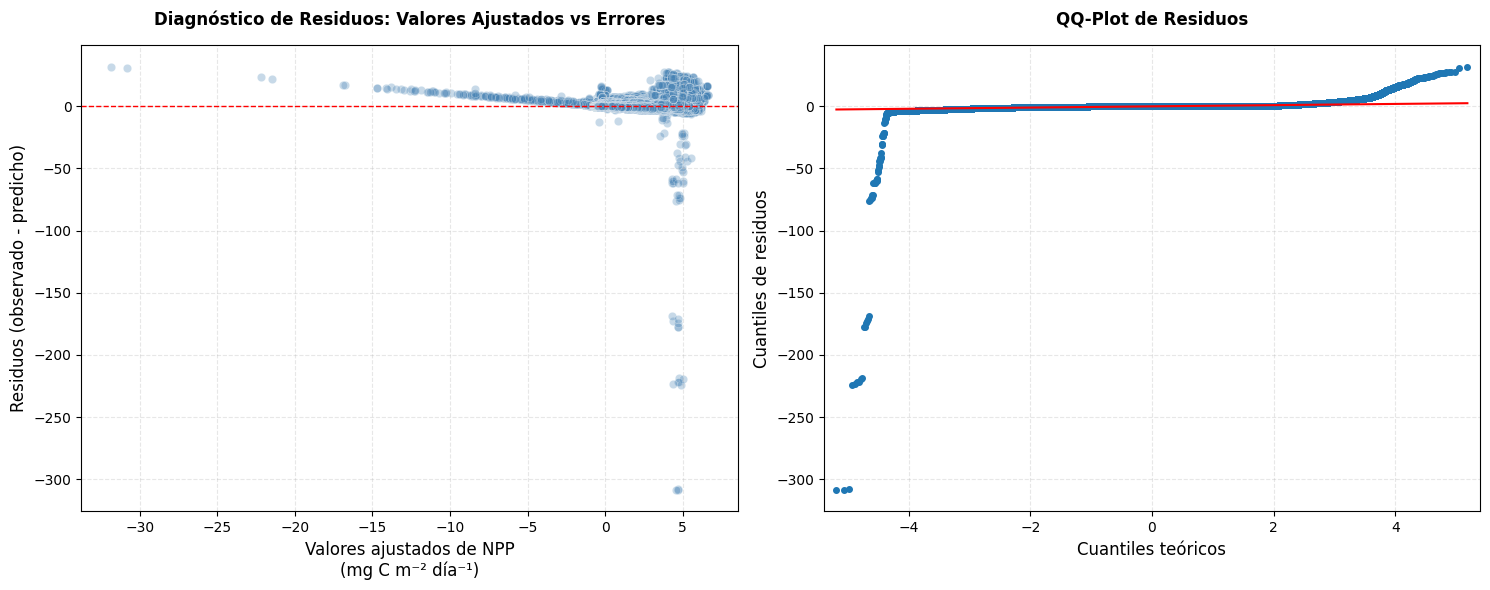

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga de datos
df = pd.read_csv(measurements_mod_DEF, sep="\t")

# 2. Selección de variables
variables = ['env_sst', 'env_par', 'env_fco2', 'env_current_uo', 
            'env_current_vo', 'bio_chl', 'bio_phyto_size_pico',
            'bio_phyto_size_nano', 'bio_phyto_size_micro']

# 3. Función corregida de limpieza y transformación
def clean_and_transform(data, columns, target):
    """Función corregida para limpieza y transformación"""
    # Copia segura solo de las columnas necesarias
    subset = data[columns + [target]].copy()
    
    # Paso 1: Reemplazar infinitos
    subset = subset.replace([np.inf, -np.inf], np.nan)
    
    # Paso 2: Transformaciones logarítmicas para variables biológicas (reemplazando las originales)
    bio_vars = ['bio_chl', 'bio_phyto_size_pico',
                'bio_phyto_size_nano', 'bio_phyto_size_micro']
    
    for var in bio_vars:
        if var in subset.columns:
            subset[var] = np.log1p(subset[var])
    
    # Paso 3: Estandarización de variables ambientales (reemplazando las originales)
    env_vars = ['env_sst', 'env_fco2', 'env_par', 'env_current_uo', 'env_current_vo']
    scaler = StandardScaler()
    subset[env_vars] = scaler.fit_transform(subset[env_vars].fillna(subset[env_vars].median()))
    
    # Paso 4: Imputación final
    imputer = SimpleImputer(strategy='median')
    imputed_data = imputer.fit_transform(subset)
    
    # Paso 5: Dataframe final (mantenemos los nombres originales de columnas)
    return pd.DataFrame(imputed_data, columns=columns + [target])

# Transformación más agresiva de variables biológicas
bio_vars = ['bio_chl', 'bio_phyto_size_pico',
            'bio_phyto_size_nano', 'bio_phyto_size_micro']

for var in bio_vars:
    df[var] = np.log1p(df[var])

# Transformación Box-Cox para la variable objetivo
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')  # Alternativa a Box-Cox
df['bio_npp_trans'] = pt.fit_transform(df[['bio_npp']])

# Aplicar limpieza y transformación
processed_data = clean_and_transform(df, variables, 'bio_npp_trans')

# 4. Preparación de datos para modelo
X_clean = processed_data.drop('bio_npp_trans', axis=1)
y_clean = processed_data['bio_npp_trans']

# Verificación de dimensiones
print(f"Dimensiones de X_clean: {X_clean.shape}")  # Debería ser (n_samples, 10)
print(f"Dimensiones de y_clean: {y_clean.shape}")  # Debería ser (n_samples,)

# 5. Modelado robusto con validación cruzada
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score

model = HuberRegressor()
scores = cross_val_score(model, X_clean, y_clean, cv=5, scoring='r2')
print(f"\nValidación cruzada - R² promedio: {scores.mean():.3f} ± {scores.std():.3f}")

# 6. Modelo final con statsmodels para interpretación
X_final = sm.add_constant(X_clean)
model_sm = sm.OLS(y_clean, X_final)
results = model_sm.fit()

# 7. Diagnóstico mejorado
print("\n" + "="*80)
print("Resultados del modelo mejorado".center(80))
print("="*80)
print(results.summary())

# 8. Gráficos diagnósticos (igual que antes)
plt.figure(figsize=(15, 6))

# Gráfico 1: Residuos vs Ajustados
plt.subplot(1, 2, 1)
sns.scatterplot(x=results.fittedvalues, y=results.resid, alpha=0.3, color='steelblue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Diagnóstico de Residuos: Valores Ajustados vs Errores", fontweight='bold', pad=15)
plt.xlabel("Valores ajustados de NPP\n(mg C m⁻² día⁻¹)", fontsize=12)
plt.ylabel("Residuos (observado - predicho)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Gráfico 2: QQ-Plot
plt.subplot(1, 2, 2)
sm.qqplot(results.resid, line='s', ax=plt.gca(), markersize=4, color='steelblue')
plt.title("QQ-Plot de Residuos", fontweight='bold', pad=15)
plt.xlabel("Cuantiles teóricos", fontsize=12)
plt.ylabel("Cuantiles de residuos", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

c:\Users\imano\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\imano\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Dimensiones de X_clean: (9320619, 9)
Dimensiones de y_clean: (9320619,)


c:\Users\imano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



Validación cruzada - R² promedio: 0.822 ± 0.029

                         Resultados del modelo mejorado                         
                            OLS Regression Results                            
Dep. Variable:          bio_npp_trans   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                 5.161e+06
Date:                Sat, 05 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:30:28   Log-Likelihood:             2.5057e+07
No. Observations:             9320619   AIC:                        -5.011e+07
Df Residuals:                 9320609   BIC:                        -5.011e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025   

c:\Users\imano\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


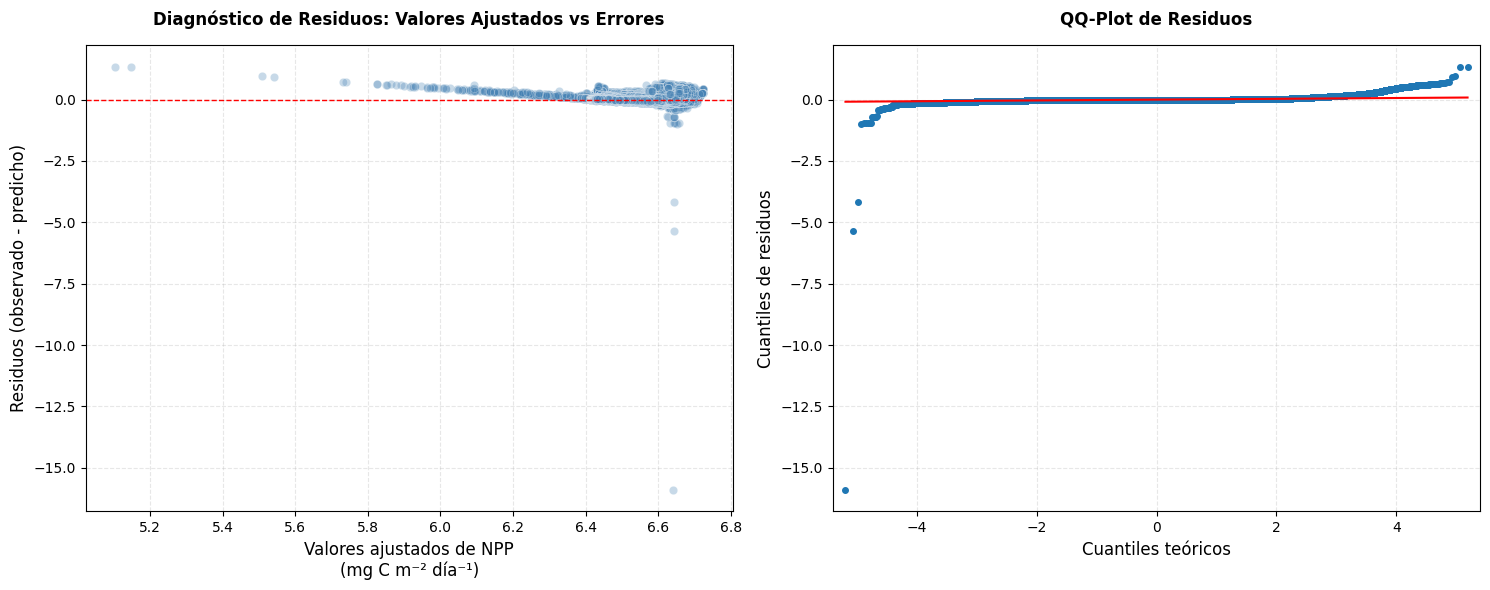

In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga de datos
df = pd.read_csv(measurements_mod_DEF, sep="\t")

# 2. Selección de variables
variables = ['env_sst', 'env_par', 'env_fco2', 'env_current_uo', 
            'env_current_vo', 'bio_chl', 'bio_phyto_size_pico',
            'bio_phyto_size_nano', 'bio_phyto_size_micro']

# 3. Función corregida de limpieza y transformación
def clean_and_transform(data, columns, target):
    """Función corregida para limpieza y transformación"""
    # Copia segura solo de las columnas necesarias
    subset = data[columns + [target]].copy()
    
    # Paso 1: Reemplazar infinitos
    subset = subset.replace([np.inf, -np.inf], np.nan)
    
    # Paso 2: Transformaciones logarítmicas para variables biológicas (reemplazando las originales)
    bio_vars = ['bio_chl', 'bio_phyto_size_pico',
                'bio_phyto_size_nano', 'bio_phyto_size_micro']
    
    for var in bio_vars:
        if var in subset.columns:
            subset[var] = np.log1p(subset[var])
    
    # Paso 3: Estandarización de variables ambientales (reemplazando las originales)
    env_vars = ['env_sst', 'env_fco2', 'env_par', 'env_current_uo', 'env_current_vo']
    scaler = StandardScaler()
    subset[env_vars] = scaler.fit_transform(subset[env_vars].fillna(subset[env_vars].median()))
    
    # Paso 4: Imputación final
    imputer = SimpleImputer(strategy='median')
    imputed_data = imputer.fit_transform(subset)
    
    # Paso 5: Dataframe final (mantenemos los nombres originales de columnas)
    return pd.DataFrame(imputed_data, columns=columns + [target])

# Transformación más agresiva de variables biológicas
bio_vars = ['bio_chl', 'bio_phyto_size_pico',
            'bio_phyto_size_nano', 'bio_phyto_size_micro']

for var in bio_vars:
    df[var] = np.log1p(df[var])

# Transformación Box-Cox para la variable objetivo
from scipy.stats import boxcox
# Calcular el desplazamiento necesario para hacer todos los valores positivos
shift = -df['bio_npp'].min() + 0.001 if df['bio_npp'].min() <= 0 else 0

# Aplicar Box-Cox con desplazamiento
df['bio_npp_trans'], lambda_ = boxcox(df['bio_npp'] + shift)

# Aplicar limpieza y transformación
processed_data = clean_and_transform(df, variables, 'bio_npp_trans')

# 4. Preparación de datos para modelo
X_clean = processed_data.drop('bio_npp_trans', axis=1)
y_clean = processed_data['bio_npp_trans']

# Verificación de dimensiones
print(f"Dimensiones de X_clean: {X_clean.shape}")  # Debería ser (n_samples, 10)
print(f"Dimensiones de y_clean: {y_clean.shape}")  # Debería ser (n_samples,)

# 5. Modelado robusto con validación cruzada
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score

model = HuberRegressor()
scores = cross_val_score(model, X_clean, y_clean, cv=5, scoring='r2')
print(f"\nValidación cruzada - R² promedio: {scores.mean():.3f} ± {scores.std():.3f}")

# 6. Modelo final con statsmodels para interpretación
X_final = sm.add_constant(X_clean)
model_sm = sm.OLS(y_clean, X_final)
results = model_sm.fit()

# 7. Diagnóstico mejorado
print("\n" + "="*80)
print("Resultados del modelo mejorado".center(80))
print("="*80)
print(results.summary())

# 8. Gráficos diagnósticos (igual que antes)
plt.figure(figsize=(15, 6))

# Gráfico 1: Residuos vs Ajustados
plt.subplot(1, 2, 1)
sns.scatterplot(x=results.fittedvalues, y=results.resid, alpha=0.3, color='steelblue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Diagnóstico de Residuos: Valores Ajustados vs Errores", fontweight='bold', pad=15)
plt.xlabel("Valores ajustados de NPP\n(mg C m⁻² día⁻¹)", fontsize=12)
plt.ylabel("Residuos (observado - predicho)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Gráfico 2: QQ-Plot
plt.subplot(1, 2, 2)
sm.qqplot(results.resid, line='s', ax=plt.gca(), markersize=4, color='steelblue')
plt.title("QQ-Plot de Residuos", fontweight='bold', pad=15)
plt.xlabel("Cuantiles teóricos", fontsize=12)
plt.ylabel("Cuantiles de residuos", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga de datos
df = pd.read_csv(measurements_mod2, sep="\t")

# 2. Selección de variables
variables = ['env_sst', 'env_par', 'env_fco2', 'env_current_uo', 
            'env_current_vo', 'bio_chl', 'bio_phyto_size_pico',
            'bio_phyto_size_nano', 'bio_phyto_size_micro']

# Transformación más agresiva de variables biológicas
bio_vars = ['bio_chl', 'bio_phyto_size_pico',
            'bio_phyto_size_nano', 'bio_phyto_size_micro']

# Ejemplo de cómo podrías haber estandarizado:
scaler = StandardScaler()
df[variables] = scaler.fit_transform(df[variables])

for var in bio_vars:
    df[var] = np.log1p(df[var])

# Transformación Box-Cox para la variable objetivo
from scipy.stats import boxcox
# Calcular el desplazamiento necesario para hacer todos los valores positivos
shift = -df['bio_npp'].min() + 0.001 if df['bio_npp'].min() <= 0 else 0

# Aplicar Box-Cox con desplazamiento
df['bio_npp_trans'], lambda_ = boxcox(df['bio_npp'] + shift)

# Obtener el archivo de mediciones modificado
measurements_mod4 = measurements_mod4
# Convertir el DataFrame a un archivo TSV
df.to_csv(measurements_mod4, sep='\t', index=False)

c:\Users\imano\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


## ✅ B. Reducción de dimensiones

### PCA o UMAP: para ver si las variables ambientales/biológicas tienen patrones combinados.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

# Datos y estandarización
df = pd.read_csv(measurements_mod, sep="\t")

# Función corregida de limpieza y transformación
def clean_and_transform(data, columns, target):
    """Función corregida para limpieza y transformación"""
    # Copia segura solo de las columnas necesarias
    subset = data[columns + [target]].copy()
    
    # Paso 1: Reemplazar infinitos
    subset = subset.replace([np.inf, -np.inf], np.nan)
    
    # Paso 2: Transformaciones logarítmicas para variables biológicas (reemplazando las originales)
    bio_vars = ['bio_chl', 'bio_phyto_pico_nano_green', 
               'bio_phyto_micro_diato', 'bio_phyto_dino_hapto']
    
    for var in bio_vars:
        if var in subset.columns:
            subset[var] = np.log1p(subset[var])
    
    # Paso 3: Estandarización de variables ambientales (reemplazando las originales)
    env_vars = ['env_sst', 'env_fco2', 'env_par', 'env_current_uo', 'env_current_vo']
    scaler = StandardScaler()
    subset[env_vars] = scaler.fit_transform(subset[env_vars].fillna(subset[env_vars].median()))
    
    # Paso 4: Imputación final
    imputer = SimpleImputer(strategy='median')
    imputed_data = imputer.fit_transform(subset)
    
    # Paso 5: Dataframe final (mantenemos los nombres originales de columnas)
    return pd.DataFrame(imputed_data, columns=columns + [target])

# features = df.filter(regex="^(env_|bio_)").drop(columns=["bio_npp"])
# features = clean_and_transform(df, features.columns.tolist(), 'bio_npp')
# X_scaled = StandardScaler().fit_transform(features)

# # Aplica UMAP
# umapper = umap.UMAP(n_components=2, random_state=42)
# X_umap = umapper.fit_transform(X_scaled)

# # Visualización
# plt.scatter(X_umap[:,0], X_umap[:,1], c=df["bio_npp"], cmap="plasma", s=5)
# plt.colorbar(label="NPP")
# plt.xlabel("UMAP 1"), plt.ylabel("UMAP 2")
# plt.title("UMAP sobre variables oceánicas y NPP")
# plt.show()

# Tomar una muestra aleatoria del 1% (ajusta según tu RAM)
sample_size = int(len(df) * 0.50)
sample_idx = np.random.choice(len(df), size=sample_size, replace=False)

# Aplicar UMAP solo a la muestra
X_sample = X_scaled[sample_idx]
umapper = umap.UMAP(n_components=2, random_state=42)
X_umap = umapper.fit_transform(X_sample)

# Visualización
plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:,0], X_umap[:,1], c=df["bio_npp"].iloc[sample_idx], 
            cmap="viridis", s=5, alpha=0.5)
plt.colorbar(label="NPP")
plt.title(f"UMAP de {sample_size:,} muestras (1% del total)")
plt.show()

## ✅ C. Importancia de características con modelo árbol

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "4"

df = pd.read_csv(measurements, sep="\t", parse_dates=["ts"])

target = 'bio_npp'

# Eliminar columnas con muchos nulos
df_clean = df.dropna(axis=1, thresh=int(0.9 * len(df)))

# Quitar columnas no numéricas
df_clean = df_clean.drop(columns=["ts", "tile"])

# Separar variables independientes y dependiente
X = df_clean.drop(columns=[target])
y = df_clean[target]

# Guardar nombres de columnas
feature_names = X.columns

# Imputación de valores faltantes
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Modelo de boosting
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Importancia de las características - FORMA DEFINITIVA
result = permutation_importance(model, X_test, y_test, n_repeats=5, random_state=42)
importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=False)

# Configuración mejorada del plot
plt.figure(figsize=(10, 6))
ax = importances.head(10).plot(kind='barh', color='steelblue', edgecolor='black')

# Título y etiquetas más informativas
plt.title('Distribución de las variables que mejor explican la productividad primaria neta (NPP)', 
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Importancia Relativa (Permutation Importance)', fontsize=12)
plt.ylabel('Variables Ambientales', fontsize=12)

# Mejoras de estilo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # La variable más importante arriba
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Añadir valores en las barras
for i, v in enumerate(importances.head(10)):
    ax.text(v + 0.001, i, f"{v:.4f}", color='black', va='center', fontsize=9)

# Ajustar márgenes
plt.tight_layout()

plt.show()

## ✅ D. Representación gráfica

### Matriz de correlación en mapa de calor.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv(measurements_mod, sep="\t")

# Seleccionar columnas numéricas relevantes
numeric_cols = df.select_dtypes(include='number').columns
df_corr = df[numeric_cols]

# Calcular la matriz de correlación
corr_matrix = df_corr.corr()

# Dibujar heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from natsort import natsorted
import matplotlib.patches as mpatches

# Cargar y preparar datos
df = pd.read_csv(measurements_mod, sep="\t")
df["ts"] = pd.to_datetime(df["ts"])
df["year"] = df["ts"].dt.to_period("Y")

# Modificar la extracción de coordenadas para manejar múltiples letras (A, AA, AB, etc.)
def letter_to_number(letters):
    """Convierte letras a número (A=1, B=2, ..., Z=26, AA=27, AB=28, etc.)"""
    number = 0
    for i, char in enumerate(reversed(letters.upper())):
        number += (ord(char) - ord('A') + 1) * (26 ** i)
    return number

# Aplicar la conversión
df['tile_letter'] = df['tile'].str.extract('([A-Z]+)')[0]
df['tile_number'] = df['tile'].str.extract('(\d+)')[0].astype(int)
df['coord_x'] = df['tile_number']
df['coord_y'] = df['tile_letter'].apply(letter_to_number)

# Seleccionar zona de interés (esquina inferior izquierda: A1-C3)
zone_tiles = df[
    (df['coord_x'].between(1, 10)) &  # Columnas 1-10
    (df['coord_y'].between(1, 10))    # Filas A-J
]['tile'].unique()

selected_tiles = natsorted(zone_tiles)[:9]  # Limitar a 9 para mejor visualización

# Calcular media anual
df_yearly = df.groupby(["year", "tile"])["bio_npp"].mean().reset_index()

# Configurar gráfico
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(selected_tiles))

# Graficar con colores diferenciados
for i, tile in enumerate(selected_tiles):
    tile_data = df_yearly[df_yearly["tile"] == tile]
    plt.plot(tile_data["year"].astype(str), 
             tile_data["bio_npp"], 
             marker='o', 
             color=palette[i],
             linewidth=2,
             label=f"{tile} (X={df[df['tile']==tile]['coord_x'].iloc[0]}, Y={df[df['tile']==tile]['coord_y'].iloc[0]})")

# Añadir mapa de ubicación como inset
ax_inset = plt.axes([0.7, 0.7, 0.2, 0.2])
for tile in selected_tiles:
    x = df[df['tile']==tile]['coord_x'].iloc[0]
    y = df[df['tile']==tile]['coord_y'].iloc[0]
    ax_inset.scatter(x, y, color=palette[selected_tiles.index(tile)], s=50)
    ax_inset.text(x, y, tile, fontsize=8, ha='center', va='bottom')
    
ax_inset.set_xlim(0, max(df['coord_x'])+1)
ax_inset.set_ylim(0, max(df['coord_y'])+1)
ax_inset.set_title("Ubicación de las regiones")
ax_inset.grid(True)

# Configuración principal
plt.xticks(rotation=45)
plt.xlabel("Año", fontsize=12)
plt.ylabel("NPP Medio (g C/m²/año)", fontsize=12)
plt.title("Evolución Temporal del NPP en la Región Macaronésica (Zona A1-J10)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Región (Coords XY)")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
palette = sns.color_palette("husl", len(regiones))

# Gráfico temporal
for i, region in enumerate(regiones.keys()):
    region_data = df_region_yearly[df_region_yearly["region"] == region]
    plt.plot(region_data["year"].astype(str), 
             region_data["bio_npp"], 
             marker='o', 
             linewidth=2,
             color=palette[i],
             label=f"{region} ({len(regiones[region])} tiles)")

# Mapa de regiones
ax_inset = plt.axes([0.7, 0.7, 0.25, 0.25])
for i, region in enumerate(regiones.keys()):
    # Calcular centroide de cada región
    tiles_region = df[df['tile'].isin(regiones[region])]
    mean_x = tiles_region['coord_x'].mean()
    mean_y = tiles_region['coord_y'].mean()
    
    ax_inset.scatter(mean_x, mean_y, color=palette[i], s=100)
    ax_inset.text(mean_x, mean_y, region.split('_')[0], 
                 fontsize=8, ha='center', va='bottom')
    
    # Dibujar rectángulo de la región
    min_x = tiles_region['coord_x'].min()
    max_x = tiles_region['coord_x'].max()
    min_y = tiles_region['coord_y'].min()
    max_y = tiles_region['coord_y'].max()
    
    rect = mpatches.Rectangle((min_x, min_y), 
                             max_x-min_x, 
                             max_y-min_y,
                             fill=False, 
                             color=palette[i],
                             alpha=0.3)
    ax_inset.add_patch(rect)

ax_inset.set_xlim(0, df['coord_x'].max()+1)
ax_inset.set_ylim(0, df['coord_y'].max()+1)
ax_inset.set_title("Mapa de Regiones Definidas")
ax_inset.grid(True)

# Configuración
plt.xticks(rotation=45)
plt.xlabel("Año", fontsize=12)
plt.ylabel("NPP Medio (g C/m²/año)", fontsize=12)
plt.title("Evolución Temporal del NPP por Regiones Agrupadas", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Regiones")
plt.tight_layout()
plt.show()

## ✅ E. Estimación del modelo estimativo

### Modelo OLS para interpretación

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1. Carga de datos
df = pd.read_csv(measurements_mod_DEF, sep="\t")

# 2. Variables explicativas (X) y dependiente (y)

variables = ['env_sst', 'env_par', 'env_fco2', 'env_current_uo', 
            'env_current_vo', 'bio_chl', 'bio_phyto_size_pico',
            'bio_phyto_size_nano', 'bio_phyto_size_micro']

# 3. Limpieza e imputación
def clean_and_impute(data, columns):
    """Función para limpieza e imputación de datos"""
    subset = data[columns].copy()
    
    # Paso 1: Reemplazar infinitos por NaN
    subset = subset.replace([np.inf, -np.inf], np.nan)
    
    # Paso 2: Imputación de valores faltantes
    imputer = SimpleImputer(strategy='median')
    imputed_data = imputer.fit_transform(subset)
    
    # Paso 3: Crear DataFrame limpio
    return pd.DataFrame(imputed_data, columns=columns)

# Aplicar limpieza
X_clean = clean_and_impute(df, variables)
y_clean = df['bio_npp_trans'].replace([np.inf, -np.inf], np.nan).fillna(df['bio_npp_trans'].median())

# Añadir intercepto (constante) al conjunto de predictores
X_final = sm.add_constant(X_clean)

# Modelo OLS (mínimos cuadrados ordinarios)
model_ols = sm.OLS(y_clean, X_final)
results_ols = model_ols.fit()

# Resumen de resultados
print(results_ols.summary())

KeyError: 'bio_npp_trans'

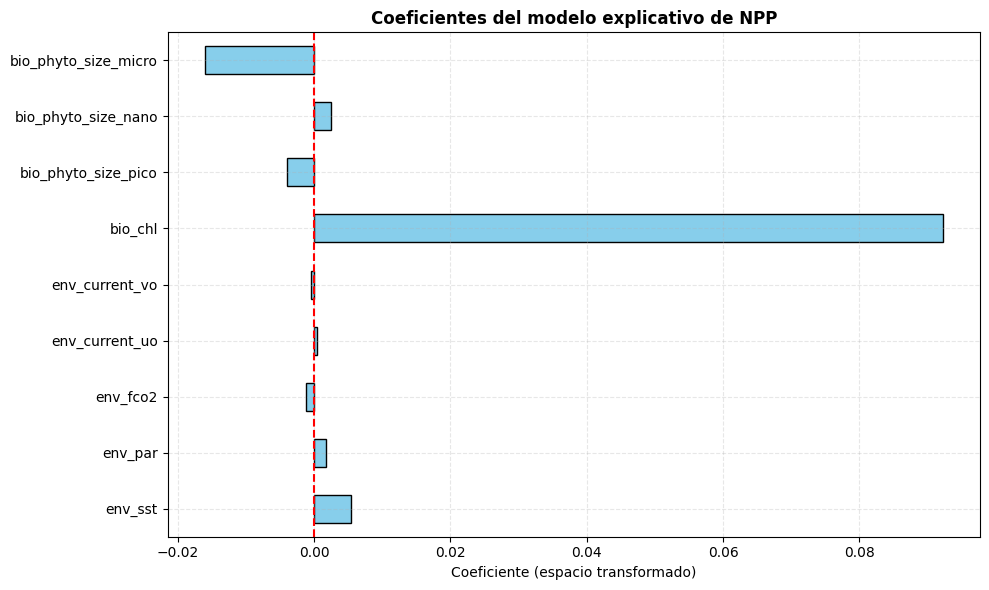

In [4]:
import matplotlib.pyplot as plt

# Extraer coeficientes (menos la constante)
coefs = results_ols.params.drop("const")
errors = results_ols.bse.drop("const")

# Plot
plt.figure(figsize=(10, 6))
coefs.plot(kind='barh', xerr=errors, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--')
plt.title("Coeficientes del modelo explicativo de NPP", fontweight='bold')
plt.xlabel("Coeficiente (espacio transformado)")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

### Modelo robusto con HuberRegressor

In [ ]:
from sklearn.linear_model import HuberRegressor

# Instanciación del modelo robusto
model_huber = HuberRegressor()
model_huber.fit(X_clean, y_clean)

# R² sobre datos completos (no recomendado para validación final)
r2_entero = model_huber.score(X_clean, y_clean)
print(f"R² sobre todos los datos: {r2_entero:.3f}")

### Validación cruzada (k-fold)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score

# Validación cruzada con 5 particiones
cv_scores = cross_val_score(model_huber, X_clean, y_clean, cv=5, scoring='r2')

# Mostrar resultados
print(f"Validación cruzada - R² promedio: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

## Evolución temporal

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = "npp_rbf_interpolated.nc"
ds = xr.open_dataset(file_path)
df = ds.to_dataframe().reset_index()

df["time"] = pd.to_datetime(df["time"])
serie = df.groupby("time")["CHL"].mean()

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot de la serie
ax.plot(serie.index, serie.values, label="CHL (media global)")

# Tendencia lineal
x = np.arange(len(serie))
y = serie.values
coef = np.polyfit(x, y, 1)
trend = np.poly1d(coef)
ax.plot(serie.index, trend(x), color="red", linestyle="--", label="Tendencia lineal")

# Detalles
ax.set_title("Evolución temporal de CHL (media global)")
ax.set_ylabel("CHL")
ax.set_xlabel("Fecha")
ax.grid()
ax.legend()
plt.tight_layout()
plt.show()

## Mapa de anomalías

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import pandas as pd
from matplotlib.colors import Normalize, LogNorm
import cmocean as cmo

# Configuración para las variables con colores divergentes
variable_config = {
    'CHL': {
        'title': 'Chlorophyll Anomaly',
        'label': r'Chlorophyll (CHL [mg/m$\mathregular{^3}$])',
        'cmap': 'RdBu_r',  # Mapa de color divergente (rojo-azul invertido)
        'log': False,       # Siempre escala lineal para anomalías
        'vmin': -0.4,
        'vmax': 0.4,
        'vcenter': 0        # Punto central para el mapa divergente
    },
    'sea_surface_temperature': {
        'title': 'SST Anomaly',
        'label': r'Sea Surface Temperature (SST [°C])',
        'cmap': 'coolwarm', # Mapa de color divergente alternativo
        'log': False,
        'vmin': -1.3,
        'vmax': 1.3,
        'vcenter': 0
    },
    'npp': {
        'title': 'NPP Anomaly',
        'label': r'Net Primary Production (NPP [mg C/m$\mathregular{^2}$ day$\mathregular{^{-1}}$])',
        'cmap': 'RdBu_r',
        'log': False,
        'vmin': -600,
        'vmax': 600,
        'vcenter': 0
    }
}

def calculate_period_average(file_path, variable, start_year, end_year):
    """Calcula la media para un período de años"""
    ds = xr.open_dataset(file_path)
    period_data = ds[variable].sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))
    return period_data.mean(dim='time', skipna=True)

def plot_anomaly(file_path, variable):
    """Calcula y representa la anomalía entre dos períodos"""
    # Calcular medias de los períodos
    early_avg = calculate_period_average(file_path, variable, 2003, 2007)
    late_avg = calculate_period_average(file_path, variable, 2019, 2023)
    
    # Calcular anomalía
    anomaly = late_avg - early_avg
    
    # Configuración de la variable
    config = variable_config[variable]
    
    # Crear figura
    fig, ax = plt.subplots(figsize=(12, 8), 
                         subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Obtener coordenadas
    ds = xr.open_dataset(file_path)
    lons = ds['longitude']
    lats = ds['latitude']
    ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], 
                 crs=ccrs.PlateCarree())
    
    # Configurar normalización
    if config['log']:
        # Para anomalías, usamos escala lineal incluso para variables logarítmicas
        norm = Normalize(vmin=config['vmin'], vmax=config['vmax'])
    else:
        norm = Normalize(vmin=config['vmin'], vmax=config['vmax'])
    
    # Mapa de calor
    mesh = ax.pcolormesh(lons, lats, anomaly, 
                        cmap=config['cmap'], 
                        transform=ccrs.PlateCarree(), 
                        norm=norm)
    
    # Añadir detalles
    ax.set_title(f"{config['title']}\n(2019-2023 avg minus 2003-2007 avg)")
    ax.coastlines()
    
    # Colorbar
    cbar = plt.colorbar(mesh, ax=ax, shrink=0.8, pad=0.05)
    cbar.set_label(config['label'], size=10, fontweight='bold')
    
    # Gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                     linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    
    plt.tight_layout()
    plt.show()

# Archivo de datos
file_path = "npp_rbf_interpolated.nc"

# Generar gráficos para las variables clave
for variable in ['CHL', 'sea_surface_temperature', 'npp']:
    plot_anomaly(file_path, variable)

## Cobertura de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo TSV
df = pd.read_csv(measurements, sep="\t")

# --- Análisis de completitud por columna (variable) ---
completitud_columnas = df.notnull().mean() * 100  # porcentaje de celdas no nulas por columna

# Excluir 'ts' y 'tile' para el gráfico
columnas_a_mostrar = [col for col in completitud_columnas.index if col not in ['ts', 'tile']]
completitud_para_grafico = completitud_columnas[columnas_a_mostrar]

# --- Análisis de completitud por fila (relación) ---
completitud_filas = df.notnull().mean(axis=1) * 100  # porcentaje de celdas no nulas por fila

# --- Mostrar resultados numéricos ---
print("Ratio de completitud por variable (columna):\n")
print(completitud_columnas.sort_values(ascending=False))

print("\nResumen estadístico de completitud por fila:\n")
print(completitud_filas.describe())

# --- Gráficos ---
plt.figure(figsize=(12, 6))

# 1. Gráfico de barras: completitud por variable
plt.subplot(1, 2, 1)
completitud_para_grafico.sort_values().plot(kind='barh', color='skyblue')
plt.title("Cobertura por Variable (%)")
plt.xlabel("Porcentaje de completitud")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 2. Histograma: distribución de completitud por fila
# plt.subplot(1, 2, 2)
# sns.histplot(completitud_filas, bins=20, kde=True, color='salmon')
# plt.title("Distribución de Cobertura por Fila")
# plt.xlabel("Porcentaje de completitud")
# plt.ylabel("Número de filas")

plt.subplot(1, 2, 2)
sns.kdeplot(completitud_filas, color='salmon', fill=True)
plt.title(f"Distribución de Densidad de Completitud\n(Total filas: {len(df):,})")
plt.xlabel("Porcentaje de completitud")
plt.ylabel("Densidad")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Composición fitoplanctónica por grupos funcionales y por tamaños

In [ ]:
# FITOPLACNTON COMPOSITION: SIZE AND FUNCTIONAL GROUPS
import pandas as pd
import matplotlib.pyplot as plt

def plot_phytoplankton_composition():
    # Cargar datos desde CSV
    file_path = measurements
    df = pd.read_csv(file_path, sep='\t')
    
    # Convertir columna de tiempo a datetime si es necesario
    if 'ts' in df.columns:
        df['ts'] = pd.to_datetime(df['ts'])
    
    # Definir grupos por tipo (especies) y por tamaño
    groups_by_type = {
        'bio.phyto.diato': 'Diatomeas',
        'bio.phyto.dino': 'Dinoflagelados',
        'bio.phyto.green': 'Clorofitas',
        'bio.phyto.hapto': 'Haptófitas'
    }
    
    groups_by_size = {
        'bio.phyto.pico': 'Picofitoplancton (<2μm)',
        'bio.phyto.nano': 'Nanofitoplancton (2-20μm)',
        'bio.phyto.micro': 'Microfitoplancton (>20μm)'
    }
    
    # Filtrar columnas disponibles
    available_by_type = [col for col in groups_by_type if col in df.columns]
    available_by_size = [col for col in groups_by_size if col in df.columns]
    
    if not available_by_type or not available_by_size:
        raise ValueError("No se encontraron las columnas necesarias en el archivo CSV")
    
    # Crear figura con dos subplots
    plt.figure(figsize=(14, 14))
    
    # Gráfico 1: Composición por tipo (especies)
    plt.subplot(2, 1, 1)
    comp_type = df.groupby('ts')[available_by_type].mean()
    comp_type = comp_type.div(comp_type.sum(axis=1), axis=0)  # Normalizar
    
    # Usar los nombres bonitos para las etiquetas
    comp_type = comp_type.rename(columns=groups_by_type)
    comp_type.plot.area(
        stacked=True, 
        colormap='viridis', 
        ax=plt.gca()
    )
    
    plt.title('Composición relativa por tipo de fitoplancton', pad=20)
    plt.ylabel('Proporción')
    plt.xlabel('')
    plt.legend(title='Tipo', bbox_to_anchor=(1.05, 1))
    plt.grid(alpha=0.3)
    
    # Gráfico 2: Composición por tamaño
    plt.subplot(2, 1, 2)
    comp_size = df.groupby('ts')[available_by_size].mean()
    comp_size = comp_size.div(comp_size.sum(axis=1), axis=0)  # Normalizar
    
    # Usar los nombres bonitos para las etiquetas
    comp_size = comp_size.rename(columns=groups_by_size)
    comp_size.plot.area(
        stacked=True, 
        colormap='plasma', 
        ax=plt.gca()
    )
    
    plt.title('Composición relativa por tamaño de fitoplancton', pad=20)
    plt.ylabel('Proporción')
    plt.xlabel('Fecha')
    plt.legend(title='Tamaño', bbox_to_anchor=(1.05, 1))
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_phytoplankton_composition()

## Explicación de resultados del modelo estimativo

Coeficientes de la regresión lineal: [0.00868132 0.22637363]
Función polinómica:  
0.008681 x + 0.2264


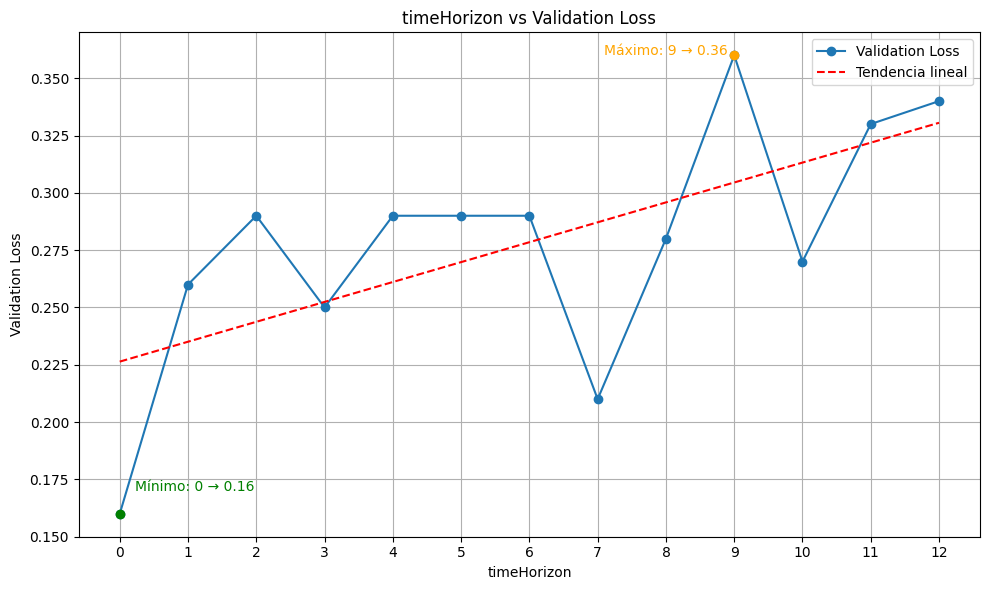

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("timehorizon_lossaccuracy.csv")

# Extraer variables
x = df['timeHorizon']
y = df['Validation Loss']

# Ajustar una regresión lineal (polinomio de grado 1)
coef = np.polyfit(x, y, deg=1)
poly1d_fn = np.poly1d(coef)
print(f"Coeficientes de la regresión lineal: {coef}")
print(f"Función polinómica: {poly1d_fn}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', label='Validation Loss')
plt.plot(x, poly1d_fn(x), linestyle='--', color='red', label='Tendencia lineal')

min_idx = y.idxmin()
plt.scatter(x[min_idx], y[min_idx], color='green', zorder=5)
plt.text(x[min_idx] + 1.1, y[min_idx] + 0.01, f'Mínimo: {x[min_idx]} → {y[min_idx]:.2f}', ha='center', color='green')

max_idx = y.idxmax()
plt.scatter(x[max_idx], y[max_idx], color='orange', zorder=5)
plt.text(x[max_idx] - 1, y[max_idx], f'Máximo: {x[max_idx]} → {y[max_idx]:.2f}', ha='center', color='orange')

plt.title('timeHorizon vs Validation Loss')
plt.xlabel('timeHorizon')
plt.ylabel('Validation Loss')
plt.grid(True)
plt.xticks(x)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Carga del dataset
ds = xr.open_dataset("dataset_grupos_fitoplancton.nc")

# Asume variables: npp, sst, par, phyto_pico, phyto_nano, phyto_micro y dimensiones time
# Convertir a DataFrame mensual promedio
df = ds[['npp', 'sea_surface_temperature', 'par', 'bio_phyto_size_pico', 'bio_phyto_size_nano', 'bio_phyto_size_micro']].to_dataframe().reset_index()
df['month'] = df['time'].dt.month
# df['quarter'] = df['time'].dt.quarter

monthly = df.groupby('month').mean()

scaler = StandardScaler()
# Columnas numéricas a escalar
cols_to_scale = ['npp', 'sea_surface_temperature', 'par', 'bio_phyto_size_pico', 'bio_phyto_size_nano', 'bio_phyto_size_micro']
monthly_norm = monthly.copy()
monthly_norm[cols_to_scale] = scaler.fit_transform(monthly[cols_to_scale])

# Serie temporal mensual
fig, ax = plt.subplots(figsize=(10, 6))
# monthly[['npp', 'sea_surface_temperature', 'par', 'bio_phyto_size_pico', 'bio_phyto_size_nano', 'bio_phyto_size_micro']].plot(ax=ax)
# Series escaladas:
ax = monthly_norm[['npp', 'sea_surface_temperature', 'par', 'bio_phyto_size_pico', 'bio_phyto_size_nano', 'bio_phyto_size_micro']].plot(ax=ax)
ax.set_ylabel("Valores medios mensuales")
ax.set_title("Ciclo anual de NPP, SST, PAR y biomasa fitoplanctónica")
ax.legend(['NPP', 'SST', 'PAR', 'Fitop. pico', 'Fitop. nano', 'Fitop. micro'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Boxplots por mes
# fig, axes = plt.subplots(3, 2, figsize=(12, 12))
# vars = ['npp', 'sea_surface_temperature', 'par', 'bio_phyto_size_pico', 'bio_phyto_size_nano', 'bio_phyto_size_micro']
# titles = ['NPP', 'SST', 'PAR', 'Fitop. pico', 'Fitop. nano', 'Fitop. micro']

# for ax, var, title in zip(axes.flat, vars, titles):
#     df.boxplot(column=var, by='month', ax=ax)
#     ax.set_title(title)
#     ax.set_xlabel("Mes")
#     ax.set_ylabel(var)
# plt.suptitle("")
# plt.tight_layout()
# plt.show()

## API para datos

API para datos desde el enlace al modelo. Se normalizan los datos porque a fecha de julio no lo están.

In [ ]:
import pandas as pd
import numpy as np
import requests
import json

# Configuración
INPUT_CSV = "transformed_measurements.csv"
OUTPUT_CSV = "transformed_measurements_with_estimates.csv"
MIN_BIO_NPP = 124.42270873244614
MAX_BIO_NPP = 13200.415848521288

def inverse_normalize(value):
    normalized = 1 - ((value - MIN_BIO_NPP) / (MAX_BIO_NPP - MIN_BIO_NPP))
    return max(0, min(1, normalized))

# Función para estimar bio_npp basado en la salida del modelo
def estimate_bio_npp(model_output):
    estimated = MAX_BIO_NPP * (1 - inverse_normalize(model_output))
    return estimated

# Procesar el CSV
df = pd.read_csv(INPUT_CSV)

# Añadir columna de estimación (inicialmente con ceros)
df['bio_npp_estimated'] = 0.0

# Simulación de estimación de bio_npp
for index, row in df.iterrows():
    if pd.notna(row['bio_npp']):
        try:
            payload = {
                'instant': row['instant'],
                'bio:chl:center': row['bio:chl:center'],
                'bio:chl:left': row['bio:chl:left'],
                'bio:chl:right': row['bio:chl:right'],
                'bio:chl:up': row['bio:chl:up'],
                'bio:chl:down': row['bio:chl:down'],
                'bio:phyto:micro:center': row['bio:phyto:micro:center'],
                'bio:phyto:micro:left': row['bio:phyto:micro:left'],
                'bio:phyto:micro:right': row['bio:phyto:micro:right'],
                'bio:phyto:micro:up': row['bio:phyto:micro:up'],
                'bio:phyto:micro:down': row['bio:phyto:micro:down'],
                'bio:phyto:nano:center': row['bio:phyto:nano:center'],
                'bio:phyto:nano:left': row['bio:phyto:nano:left'],
                'bio:phyto:nano:right': row['bio:phyto:nano:right'],
                'bio:phyto:nano:up': row['bio:phyto:nano:up'],
                'bio:phyto:nano:down': row['bio:phyto:nano:down'],
                'bio:phyto:pico:center': row['bio:phyto:pico:center'],
                'bio:phyto:pico:left': row['bio:phyto:pico:left'],
                'bio:phyto:pico:right': row['bio:phyto:pico:right'],
                'bio:phyto:pico:up': row['bio:phyto:pico:up'],
                'bio:phyto:pico:down': row['bio:phyto:pico:down'],
                'bio_npp': row['bio_npp'],
                'env:current:uo:center': row['env:current:uo:center'],
                'env:current:uo:left': row['env:current:uo:left'],
                'env:current:uo:right': row['env:current:uo:right'],
                'env:current:uo:up': row['env:current:uo:up'],
                'env:current:uo:down': row['env:current:uo:down'],
                'env:current:vo:center': row['env:current:vo:center'],
                'env:current:vo:left': row['env:current:vo:left'],
                'env:current:vo:right': row['env:current:vo:right'],
                'env:current:vo:up': row['env:current:vo:up'],
                'env:current:vo:down': row['env:current:vo:down'],
                'env:fco2:center': row['env:fco2:center'],
                'env:fco2:left': row['env:fco2:left'],
                'env:fco2:right': row['env:fco2:right'],
                'env:fco2:up': row['env:fco2:up'],
                'env:fco2:down': row['env:fco2:down'],
                'env:par:center': row['env:par:center'],
                'env:par:left': row['env:par:left'],
                'env:par:right': row['env:par:right'],
                'env:par:up': row['env:par:up'],
                'env:par:down': row['env:par:down'],
                'env:sst:center': row['env:sst:center'],
                'env:sst:left': row['env:sst:left'],
                'env:sst:right': row['env:sst:right'],
                'env:sst:up': row['env:sst:up'],
                'env:sst:down': row['env:sst:down']
            }

            response = requests.post(
                "https://picota.io/api/1.0.0/digital-twin/9f8fc09f-076e-48fd-ac92-62387eb8e7d7/subject/Cell/inference",
                headers={"Content-Type": "application/json"},
                data=json.dumps(payload)
            )

            model_output = response.json()[0]["value"]

            estimated_value = estimate_bio_npp(model_output)
            df.at[index, 'bio_npp_estimated'] = estimated_value


        except Exception as e:
            print(f"Error en fila {index}: {str(e)}")
            df.at[index, 'bio_npp_estimated'] = 0.0

# Guardar resultados
df.to_csv(OUTPUT_CSV, index=False)
print(f"Archivo guardado en {OUTPUT_CSV}")
print(f"Resumen de estimaciones:")
print(f" - Mínimo: {df['bio_npp_estimated'].min():.2f}")
print(f" - Máximo: {df['bio_npp_estimated'].max():.2f}")
print(f" - Registros estimados: {(df['bio_npp_estimated'] > 0).sum()}")

In [ ]:
import pandas as pd
import numpy as np
import requests
import json
from datetime import datetime
from tqdm import tqdm  # Importar tqdm para la barra de progreso

# Configuración
INPUT_CSV = measurements
OUTPUT_CSV = "transformed_measurements_with_estimates.csv"
START_DATE = '2002-08-01'
END_DATE = '2023-12-01'

def transform_model_output(model_value, mean_model=3300, std_model=25):
    z = (model_value - mean_model) / std_model
    
    # Normalización robusta con tanh para mantener entre (-1, 1)
    scaled = np.tanh(z)

    # Escalado al rango bio_npp
    min_bio = 228.19
    max_bio = 464.88
    norm = (scaled + 1) / 2  # convertimos de (-1,1) -> (0,1)
    estimated = min_bio + norm * (max_bio - min_bio)

    return np.clip(estimated, min_bio, max_bio)

# Procesar el CSV
df = pd.read_csv(INPUT_CSV)
df['instant'] = pd.to_datetime(df['instant'])
mask = (df['instant'] >= START_DATE) & (df['instant'] <= END_DATE)
df_filtered = df.loc[mask].copy()
# Agrupar por fecha y tomar 10 muestras aleatorias por grupo
# Asegurarse de que 'instant' es datetime (si no lo es ya)

df_filtered['instant'] = pd.to_datetime(df_filtered['instant'])

# Obtener fechas únicas
fechas_unicas = df_filtered['instant'].drop_duplicates().sample(n=20, random_state=42)

# Filtrar solo esas fechas
df_fechas_aleatorias = df_filtered[df_filtered['instant'].isin(fechas_unicas)]

df_muestras = (
    df_fechas_aleatorias
    .groupby('instant', group_keys=False)
    .apply(lambda x: x.sample(n=min(10, len(x)), random_state=42))
)

# Resultado: DataFrame con 10 filas por fecha mensual
print(df_muestras.head(20))  # muestra de ejemplo
print(f"Número total de filas: {len(df_muestras)}")
print(f"Número de fechas distintas: {df_muestras['instant'].nunique()}")

# Obtener fechas únicas para la barra de progreso
unique_dates = df_muestras['instant'].dt.strftime('%Y-%m').unique()

# Configurar barra de progreso principal para fechas
with tqdm(total=len(df_muestras), desc="Procesando todas las fechas") as pbar_total:
    # Procesar cada registro con barra de progreso
    for index, row in tqdm(df_muestras.iterrows(), total=len(df_muestras), desc="Procesando registros"):
        if pd.notna(row['bio_npp']):
            try:
                # Construir payload
                payload = {
                    'instant': row['instant'].strftime('%Y-%m-%dT%H:%M:%SZ'),
                    'bio:chl:center': row['bio:chl:center'],
                    'bio:chl:left': row['bio:chl:left'],
                    'bio:chl:right': row['bio:chl:right'],
                    'bio:chl:up': row['bio:chl:up'],
                    'bio:chl:down': row['bio:chl:down'],
                    'bio:phyto:micro:center': row['bio:phyto:micro:center'],
                    'bio:phyto:micro:left': row['bio:phyto:micro:left'],
                    'bio:phyto:micro:right': row['bio:phyto:micro:right'],
                    'bio:phyto:micro:up': row['bio:phyto:micro:up'],
                    'bio:phyto:micro:down': row['bio:phyto:micro:down'],
                    'bio:phyto:nano:center': row['bio:phyto:nano:center'],
                    'bio:phyto:nano:left': row['bio:phyto:nano:left'],
                    'bio:phyto:nano:right': row['bio:phyto:nano:right'],
                    'bio:phyto:nano:up': row['bio:phyto:nano:up'],
                    'bio:phyto:nano:down': row['bio:phyto:nano:down'],
                    'bio:phyto:pico:center': row['bio:phyto:pico:center'],
                    'bio:phyto:pico:left': row['bio:phyto:pico:left'],
                    'bio:phyto:pico:right': row['bio:phyto:pico:right'],
                    'bio:phyto:pico:up': row['bio:phyto:pico:up'],
                    'bio:phyto:pico:down': row['bio:phyto:pico:down'],
                    'bio_npp': row['bio_npp'],
                    'env:current:uo:center': row['env:current:uo:center'],
                    'env:current:uo:left': row['env:current:uo:left'],
                    'env:current:uo:right': row['env:current:uo:right'],
                    'env:current:uo:up': row['env:current:uo:up'],
                    'env:current:uo:down': row['env:current:uo:down'],
                    'env:current:vo:center': row['env:current:vo:center'],
                    'env:current:vo:left': row['env:current:vo:left'],
                    'env:current:vo:right': row['env:current:vo:right'],
                    'env:current:vo:up': row['env:current:vo:up'],
                    'env:current:vo:down': row['env:current:vo:down'],
                    'env:fco2:center': row['env:fco2:center'],
                    'env:fco2:left': row['env:fco2:left'],
                    'env:fco2:right': row['env:fco2:right'],
                    'env:fco2:up': row['env:fco2:up'],
                    'env:fco2:down': row['env:fco2:down'],
                    'env:par:center': row['env:par:center'],
                    'env:par:left': row['env:par:left'],
                    'env:par:right': row['env:par:right'],
                    'env:par:up': row['env:par:up'],
                    'env:par:down': row['env:par:down'],
                    'env:sst:center': row['env:sst:center'],
                    'env:sst:left': row['env:sst:left'],
                    'env:sst:right': row['env:sst:right'],
                    'env:sst:up': row['env:sst:up'],
                    'env:sst:down': row['env:sst:down']
                }
                
                response = requests.post(
                    "https://picota.io/api/1.0.0/digital-twin/9f8fc09f-076e-48fd-ac92-62387eb8e7d7/subject/Cell/inference",
                    headers={"Content-Type": "application/json"},
                    data=json.dumps(payload),
                    timeout=15
                )
                
                if response.status_code == 200:
                    response_data = response.json()
                    if isinstance(response_data, list) and len(response_data) > 0:
                        model_output = response_data[0].get("value", 0)
                        
                        # Calcular estimación con la nueva transformación
                        estimated = transform_model_output(model_output)
                        df_muestras.at[index, 'bio_npp_estimated'] = estimated

                        print(f"Fila {index} procesada: Fecha {row['instant']}, Modelo: {model_output:.2f}, Estimado: {estimated:.2f}, Bio NPP: {row['bio_npp']:.2f}")
                        
                        # Mostrar progreso en la barra
                        pbar_total.set_postfix_str(f"Fecha: {row['instant'].strftime('%Y-%m')}, Modelo: {model_output:.2f}, Estimado: {estimated:.2f}")
            
            except Exception as e:
                print(f"\nError en fila {index}: {str(e)}")
                df_muestras.at[index, 'bio_npp_estimated'] = np.nan
        
        # Actualizar barra de progreso
        pbar_total.update(1)

# Guardar resultados
df['bio_npp_estimated'] = np.nan
df.update(df_muestras)
df.to_csv(OUTPUT_CSV, index=False)

# Reporte final
print("\nResultados finales:")
print(df_muestras[['bio_npp', 'bio_npp_estimated']].describe())
print("\nEjemplos:")
print(df_muestras[['bio_npp', 'bio_npp_estimated']].head(10))